# Explorary Data Analysis

## Import Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import library
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Dataset first preprocessing
- 몇몇 데이터가 int/float 타입이 아닌 object 타입으로 구성되어 있음
- 해당 데이터프레임의 데이터타입을 변경하고, 하나의 데이터 프레임으로 합쳐주는 과정을 수행함

In [ ]:
%pwd

'/content'

In [ ]:
cd "/content/drive/MyDrive/Colab Notebooks/DL_proj/ddos_10days"

/content/drive/MyDrive/Colab Notebooks/DL_proj/ddos_10days


In [ ]:
%pwd

'/content/drive/MyDrive/Colab Notebooks/DL_proj/ddos_10days'

In [ ]:
!unzip -qq "/content/drive/MyDrive/Colab Notebooks/DL_proj/kaggle_ddos.zip"

In [ ]:
# Memory reduction
def reduceMemory(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
# Get dataset
def get_df():
  path = '/content/drive/MyDrive/Colab Notebooks/DL_proj/ddos_10days'
  files = []
  for i, file in enumerate(glob.glob(path + '/*.csv')):
    df = pd.read_csv(file)
    print(str(file))
    df = reduceMemory(df)
    files.append(df)
  
  df = pd.concat(files, ignore_index=True)
  return df

In [ ]:
df = get_df()

In [ ]:
# Get dataset (object)
def get_df_object():
  path = '/content/drive/MyDrive/Colab Notebooks/DL_proj/ddos_10days/object'
  files = []
  for i, file in enumerate(glob.glob(path + '/*.csv')):
    df = pd.read_csv(file)
    print(str(file))
    files.append(df)
  
  df = pd.concat(files, ignore_index=True)
  return df

In [ ]:
df_ob = get_df_object()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


/content/drive/MyDrive/Colab Notebooks/DL_proj/ddos_10days/object/02-16-2018.csv
/content/drive/MyDrive/Colab Notebooks/DL_proj/ddos_10days/object/02-28-2018.csv
/content/drive/MyDrive/Colab Notebooks/DL_proj/ddos_10days/object/03-01-2018.csv


In [ ]:
df_ob = df_ob[df_ob['Dst Port']!='Dst Port']

In [ ]:
for i in range(len(df_ob.columns)):
  df_ob[df_ob.columns[i]] = df_ob[df_ob.columns[i]].astype(list(df.dtypes)[i])
df_ob.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992745 entries, 0 to 1992790
Data columns (total 80 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           int32  
 1   Protocol           int8   
 2   Timestamp          object 
 3   Flow Duration      int64  
 4   Tot Fwd Pkts       int32  
 5   Tot Bwd Pkts       int32  
 6   TotLen Fwd Pkts    int32  
 7   TotLen Bwd Pkts    float64
 8   Fwd Pkt Len Max    int32  
 9   Fwd Pkt Len Min    int16  
 10  Fwd Pkt Len Mean   float16
 11  Fwd Pkt Len Std    float16
 12  Bwd Pkt Len Max    int16  
 13  Bwd Pkt Len Min    int16  
 14  Bwd Pkt Len Mean   float16
 15  Bwd Pkt Len Std    float16
 16  Flow Byts/s        float64
 17  Flow Pkts/s        float64
 18  Flow IAT Mean      float32
 19  Flow IAT Std       float32
 20  Flow IAT Max       float64
 21  Flow IAT Min       float64
 22  Fwd IAT Tot        float64
 23  Fwd IAT Mean       float32
 24  Fwd IAT Std        float32
 25  Fwd IAT Max       

In [ ]:
df.columns == df_ob.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
df = pd.concat([df, df_ob])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8284195 entries, 0 to 1992790
Data columns (total 80 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           int32  
 1   Protocol           int8   
 2   Timestamp          object 
 3   Flow Duration      int64  
 4   Tot Fwd Pkts       int32  
 5   Tot Bwd Pkts       int32  
 6   TotLen Fwd Pkts    int32  
 7   TotLen Bwd Pkts    float64
 8   Fwd Pkt Len Max    int32  
 9   Fwd Pkt Len Min    int16  
 10  Fwd Pkt Len Mean   float16
 11  Fwd Pkt Len Std    float16
 12  Bwd Pkt Len Max    int16  
 13  Bwd Pkt Len Min    int16  
 14  Bwd Pkt Len Mean   float16
 15  Bwd Pkt Len Std    float16
 16  Flow Byts/s        float64
 17  Flow Pkts/s        float64
 18  Flow IAT Mean      float32
 19  Flow IAT Std       float32
 20  Flow IAT Max       float64
 21  Flow IAT Min       float64
 22  Fwd IAT Tot        float64
 23  Fwd IAT Mean       float32
 24  Fwd IAT Std        float32
 25  Fwd IAT Max       

In [ ]:
len(df)

8284195

In [ ]:
df.head()

Dst Port  Protocol            Timestamp  ...    Idle Max    Idle Min   Label
0         0         0  14/02/2018 08:31:01  ...  56320958.0  56320761.0  Benign
1         0         0  14/02/2018 08:33:50  ...  56320814.0  56320652.0  Benign
2         0         0  14/02/2018 08:36:39  ...  56319525.0  56319098.0  Benign
3        22         6  14/02/2018 08:40:13  ...         0.0         0.0  Benign
4        22         6  14/02/2018 08:40:23  ...         0.0         0.0  Benign

[5 rows x 80 columns]

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 100)

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/DL_proj/ddos_10days/concat/9days_concat.csv')

## df to pickle
- for data loading time saving

In [ ]:
# pandas loading
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL_proj/ddos_10days/concat/9days_concat.csv')
df = df[['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts',
      'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
      'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
      'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
      'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
      'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
      'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
      'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
      'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
      'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
      'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
      'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
      'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
      'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
      'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
      'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
      'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
      'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
      'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
      'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'Label']]

# Nan, inf, 1970, minus value remove
df = df[~df['Flow Byts/s'].isna()]
df = df[(df['Flow Byts/s']!=float('inf')) & (df['Flow Pkts/s']!=float('inf'))]
df = df[df['Flow Duration']>=0]  # 1970
df = df[df['Flow IAT Min']>=0]  # minus
df = df[df['Bwd Pkt Len Max']>=0]  # minus

# Benign / Not Benign
def func(x) :
    if x == 'Benign': return 0
    else : return 1
df['Type'] = df['Label'].apply(lambda x : func(x))

In [ ]:
import pickle
import pandas as pd

# 데이터 저장
df.to_pickle('/content/drive/MyDrive/Colab Notebooks/DL_proj/ddos_10days/concat/df_with_type.pkl')

# 데이터 로드
df = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/DL_proj/ddos_10days/concat/df_with_type.pkl')

## Data load with pickle

In [ ]:
import pandas as pd
df = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/DL_proj/ddos_10days/concat/df_with_type.pkl')

In [ ]:
df.head()

Dst Port  Protocol  Flow Duration  ...    Idle Min   Label  Type
0         0         0      112641719  ...  56320761.0  Benign     0
1         0         0      112641466  ...  56320652.0  Benign     0
2         0         0      112638623  ...  56319098.0  Benign     0
3        22         6        6453966  ...         0.0  Benign     0
4        22         6        8804066  ...         0.0  Benign     0

[5 rows x 80 columns]

In [ ]:
df.Protocol.unique()

array([ 0,  6, 17])

In [ ]:
# Memory reduction
import numpy as np
def reduceMemory(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df
df = reduceMemory(df)

Mem. usage decreased to 1895.65 Mb (62.8% reduction)


In [ ]:
df.tail()

Dst Port  Protocol  Flow Duration  ...  Idle Min   Label  Type
8284187      3389         6        3866185  ...       0.0  Benign     0
8284189      3389         6        1721142  ...       0.0  Benign     0
8284191      2634         6         114340  ...       0.0  Benign     0
8284192      3389         6        1404866  ...       0.0  Benign     0
8284193      3389         6        3966663  ...       0.0  Benign     0

[5 rows x 80 columns]

## Data Analysis

In [ ]:
df.head()

Dst Port  Protocol            Timestamp  ...    Idle Max    Idle Min   Label
0         0         0  14/02/2018 08:31:01  ...  56320958.0  56320761.0  Benign
1         0         0  14/02/2018 08:33:50  ...  56320814.0  56320652.0  Benign
2         0         0  14/02/2018 08:36:39  ...  56319525.0  56319098.0  Benign
3        22         6  14/02/2018 08:40:13  ...         0.0         0.0  Benign
4        22         6  14/02/2018 08:40:23  ...         0.0         0.0  Benign

[5 rows x 80 columns]

### Timestamp converted

In [ ]:
# timestamp changed
df['Timestamp'] = dd.to_datetime(df['Timestamp'], format='%d/%m/%Y %H:%M:%S')
df['dayofweek'] = df['Timestamp'].dt.weekday
df['Timestamp'] = df['Timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')
df['Timestamp'] = df['Timestamp'].str[:10]

In [ ]:
# timestamp check
df.groupby(df['Timestamp']).count()

Dst Port  Protocol  Flow Duration  ...  Idle Min    Label  dayofweek
Timestamp                                      ...                              
2018-02-14   1044746   1044746        1044746  ...   1044746  1044746    1044746
2018-02-15   1040548   1040548        1040548  ...   1040548  1040548    1040548
2018-02-21   1048575   1048575        1048575  ...   1048575  1048575    1048575
2018-02-22   1042956   1042956        1042956  ...   1042956  1042956    1042956
2018-02-23   1042867   1042867        1042867  ...   1042867  1042867    1042867
2018-03-02   1044525   1044525        1044525  ...   1044525  1044525    1044525
2018-02-16   1048574   1048574        1048574  ...   1048574  1048574    1048574
2018-02-28    606902    606902         606902  ...    606902   606902     606902
2018-03-01    328181    328181         328181  ...    328181   328181     328181

[9 rows x 80 columns]

### Dayofweek - Benign flow
- It seems to be no difference according to Dayofweek.

In [ ]:
# dayofweek
df_benign = df[df['Label']=='Benign']
target_col = ['Flow Pkts/s', 'Fwd Seg Size Min', 'dayofweek']
df_benign_target = df_benign[target_col]

df_benign_groupby = df_benign.groupby("dayofweek")[['Flow Pkts/s', 'Fwd Seg Size Min']].mean()
df_benign_groupby

Flow Pkts/s  Fwd Seg Size Min
dayofweek                                
2          41333.875013         16.882819
3          39471.967057         15.942447
4          21303.516545         19.515869

- 예상과는 달리 요일별로 흐름 차이가 크지 않을 듯하다.

### Label check
- Normal : Abnormal = 3 : 1
- The most frequent attack is 'DDOS attack-HOIC' (686,012), which is about 10% against Benign(Normal).
- 라벨 간의 특성 차이가 있는 것으로 나타났다.

Benign                      6077129
DDOS attack-HOIC             686012
DoS attacks-Hulk             461912
Bot                          286191
FTP-BruteForce               193354
SSH-Bruteforce               187589
Infilteration                160639
DoS attacks-SlowHTTPTest     139890
DoS attacks-GoldenEye         41508
DoS attacks-Slowloris         10990
DDOS attack-LOIC-UDP           1730
Brute Force -Web                611
Brute Force -XSS                230
SQL Injection                    87
Name: Label, dtype: int64


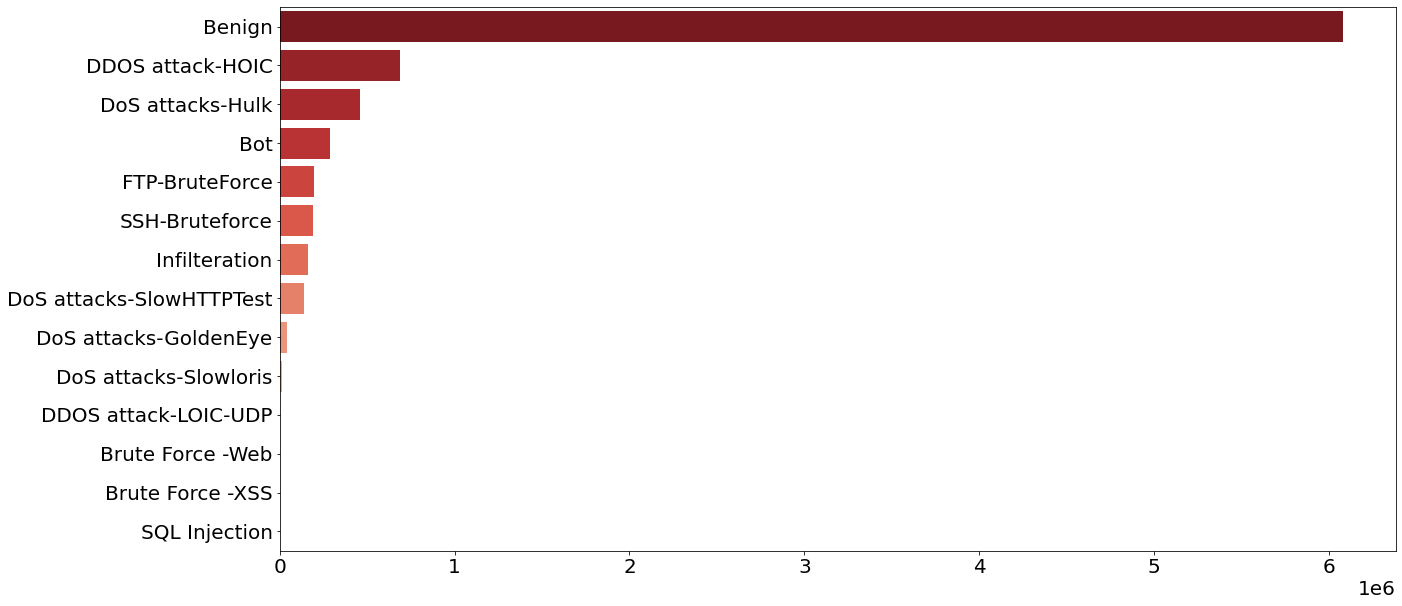

In [ ]:
# Label
import matplotlib.pyplot as plt
import seaborn as sns
label_num = df["Label"].value_counts()
print(label_num)
plt.figure(figsize=(20, 10))
sns.barplot(x=label_num.values, y=label_num.index, palette='Reds_r')
plt.rc('font', size=20)
plt.show()

#### Label - Mean value Vis

In [ ]:
# Label
df_label_mean = df.groupby('Label').mean()
df_label_mean

Dst Port   Protocol  ...      Idle Min  dayofweek
Label                                              ...                         
Benign                    13901.015563   8.863728  ...  5.691984e+06   3.112570
FTP-BruteForce               21.000000   6.000000  ...  0.000000e+00   2.000000
SSH-Bruteforce               21.999840   6.000000  ...  0.000000e+00   2.000000
DoS attacks-GoldenEye        80.000000   6.000000  ...  8.114331e+06   3.000000
DoS attacks-Slowloris        80.000000   6.000000  ...  2.753441e+07   3.000000
DDOS attack-HOIC             80.000000   6.000000  ...  0.000000e+00   2.000000
DDOS attack-LOIC-UDP         80.000000  17.000000  ...  0.000000e+00   2.000000
Brute Force -Web            215.653028   8.098200  ...  3.420585e+06   3.592471
Brute Force -XSS             87.247826   6.239130  ...  1.252241e+05   3.656522
SQL Injection                80.000000   6.000000  ...  0.000000e+00   3.609195
Bot                        8721.356451   5.994591  ...  2.448609e+04   4.000000
DoS attacks-SlowHTTPTest     21.000000   6.000000  ...  0.000000e+00   4.000000
DoS attacks-Hulk             80.000000   6.000000  ...  1.910300e+05   4.000000
Infilteration              8354.749102   9.432728  ...  3.409903e+06   2.575221

[14 rows x 79 columns]

In [ ]:
df_label_mean_target = df_label_mean[['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'Flow Byts/s', 'Flow Pkts/s', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Idle Mean']]
df_label_mean_target

Flow Duration  ...     Idle Mean
Label                                    ...              
Benign                     1.428140e+07  ...  5.833036e+06
FTP-BruteForce             3.803314e+00  ...  0.000000e+00
SSH-Bruteforce             1.833497e+05  ...  0.000000e+00
DoS attacks-GoldenEye      1.123344e+07  ...  8.168378e+06
DoS attacks-Slowloris      7.198034e+07  ...  3.472144e+07
DDOS attack-HOIC           9.720325e+03  ...  0.000000e+00
DDOS attack-LOIC-UDP       1.160182e+08  ...  0.000000e+00
Brute Force -Web           3.544130e+07  ...  6.342599e+06
Brute Force -XSS           2.866270e+07  ...  3.716490e+05
SQL Injection              3.315727e+06  ...  0.000000e+00
Bot                        7.529891e+04  ...  2.541694e+04
DoS attacks-SlowHTTPTest   4.899886e+00  ...  0.000000e+00
DoS attacks-Hulk           3.017556e+05  ...  1.910300e+05
Infilteration              1.131330e+07  ...  3.634550e+06

[14 rows x 11 columns]

Label
Benign                      1.428140e+07
FTP-BruteForce              3.803314e+00
SSH-Bruteforce              1.833497e+05
DoS attacks-GoldenEye       1.123344e+07
DoS attacks-Slowloris       7.198034e+07
DDOS attack-HOIC            9.720325e+03
DDOS attack-LOIC-UDP        1.160182e+08
Brute Force -Web            3.544130e+07
Brute Force -XSS            2.866270e+07
SQL Injection               3.315727e+06
Bot                         7.529891e+04
DoS attacks-SlowHTTPTest    4.899886e+00
DoS attacks-Hulk            3.017556e+05
Infilteration               1.131330e+07
Name: Flow Duration, dtype: float64


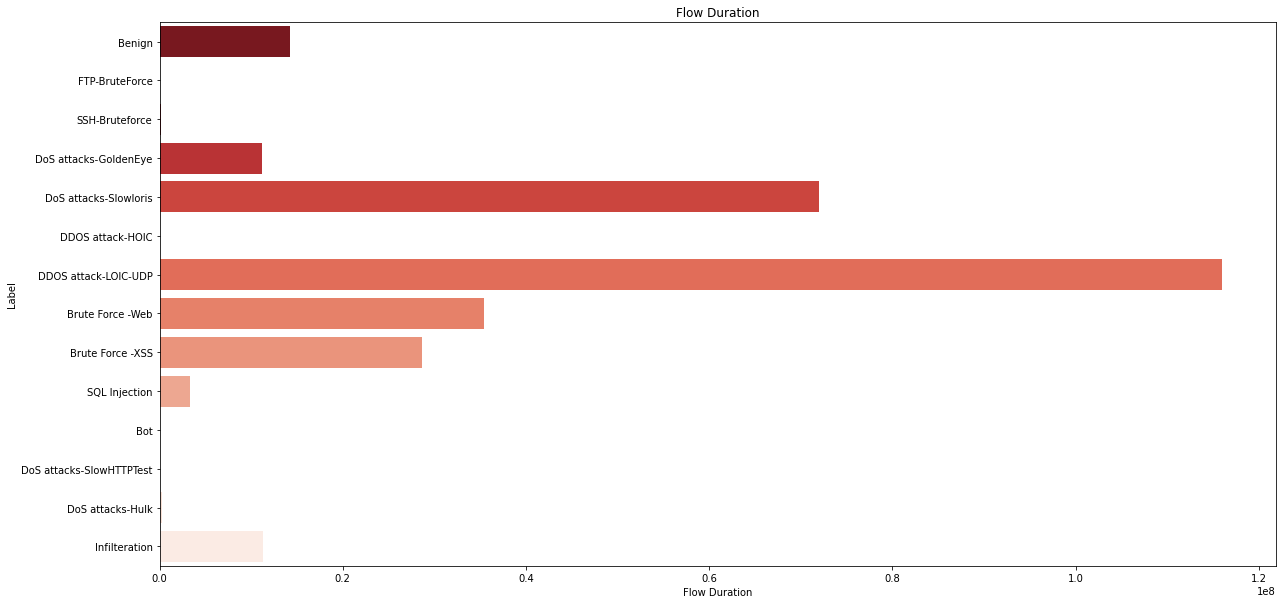

In [ ]:
# Label - Flow duration mean
target = 'Flow Duration'
print(df_label_mean_target[target])
plt.figure(figsize=(20, 10))
sns.barplot(x=df_label_mean_target[target], y=df_label_mean_target.index, palette='Reds_r')
plt.title(target)
plt.show()

Label
Benign                           6.095678
FTP-BruteForce                   1.000000
SSH-Bruteforce                  11.723651
DoS attacks-GoldenEye            3.728775
DoS attacks-Slowloris            7.665332
DDOS attack-HOIC                 2.238698
DDOS attack-LOIC-UDP        117351.428902
Brute Force -Web                35.279869
Brute Force -XSS                97.017391
SQL Injection                    4.149425
Bot                              2.565458
DoS attacks-SlowHTTPTest         1.000000
DoS attacks-Hulk                 2.226872
Infilteration                    4.857886
Name: Tot Fwd Pkts, dtype: float64


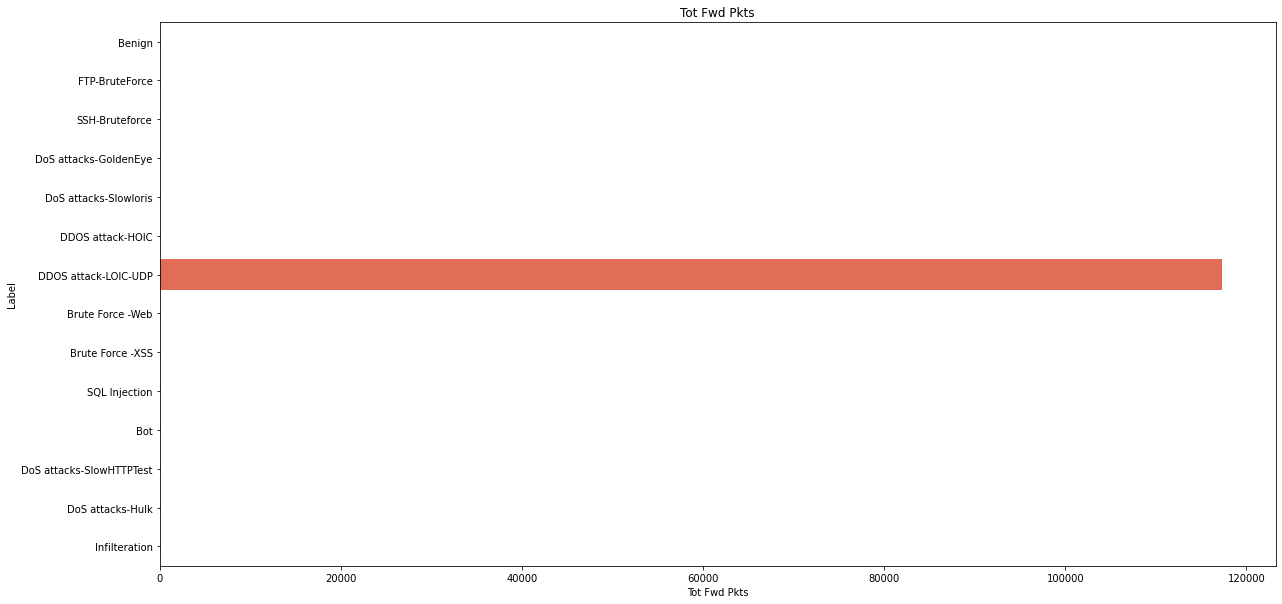

In [ ]:
# Label - Tot Fwd Pkts mean
target = 'Tot Fwd Pkts'
print(df_label_mean_target[target])
plt.figure(figsize=(20, 10))
sns.barplot(x=df_label_mean_target[target], y=df_label_mean_target.index, palette='Reds_r')
plt.title(target)
plt.show()

Label
Benign                       7.319327
FTP-BruteForce               1.000000
SSH-Bruteforce              11.153293
DoS attacks-GoldenEye        2.384504
DoS attacks-Slowloris        1.917743
DDOS attack-HOIC             0.954794
DDOS attack-LOIC-UDP         0.000000
Brute Force -Web            22.762684
Brute Force -XSS            49.160870
SQL Injection                2.528736
Bot                          2.022712
DoS attacks-SlowHTTPTest     1.000000
DoS attacks-Hulk             0.241548
Infilteration                4.453053
Name: Tot Bwd Pkts, dtype: float64


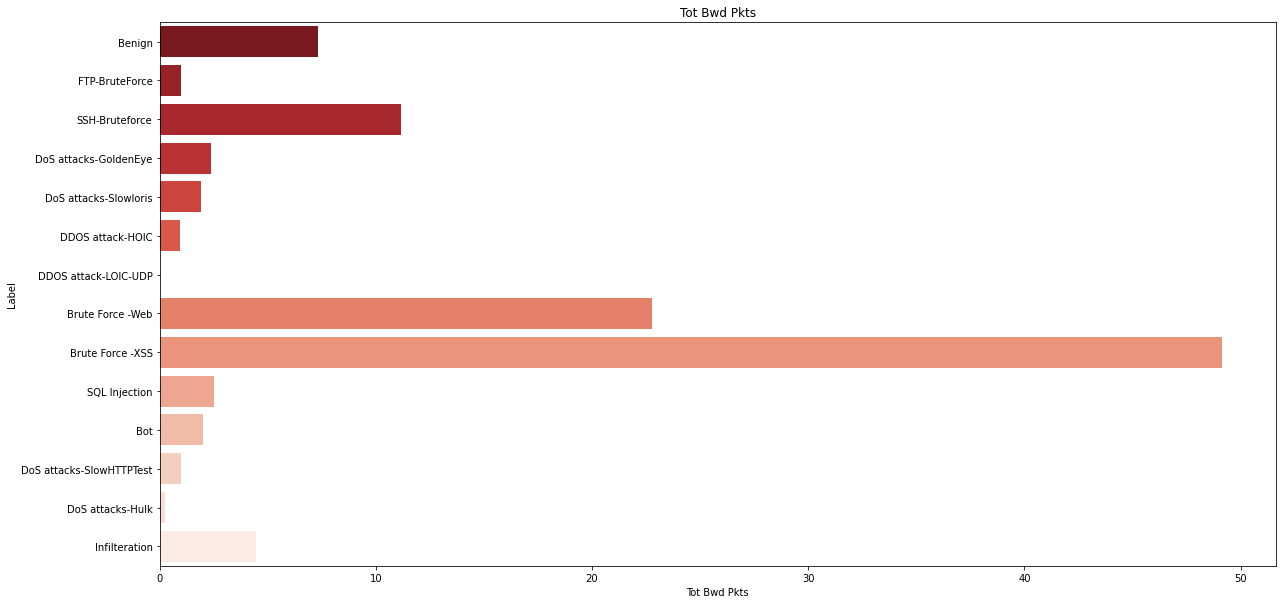

In [ ]:
# Label - Tot Bwd Pkts mean
target = 'Tot Bwd Pkts'
print(df_label_mean_target[target])
plt.figure(figsize=(20, 10))
sns.barplot(x=df_label_mean_target[target], y=df_label_mean_target.index, palette='Reds_r')
plt.title(target)
plt.show()

Label
Benign                      17.505852
FTP-BruteForce              40.000000
SSH-Bruteforce              32.001279
DoS attacks-GoldenEye       31.999711
DoS attacks-Slowloris       33.488262
DDOS attack-HOIC            20.000000
DDOS attack-LOIC-UDP         8.000000
Brute Force -Web            16.818331
Brute Force -XSS            19.739130
SQL Injection               20.000000
Bot                         19.982697
DoS attacks-SlowHTTPTest    40.000000
DoS attacks-Hulk            31.967085
Infilteration               17.119703
Name: Fwd Seg Size Min, dtype: float64


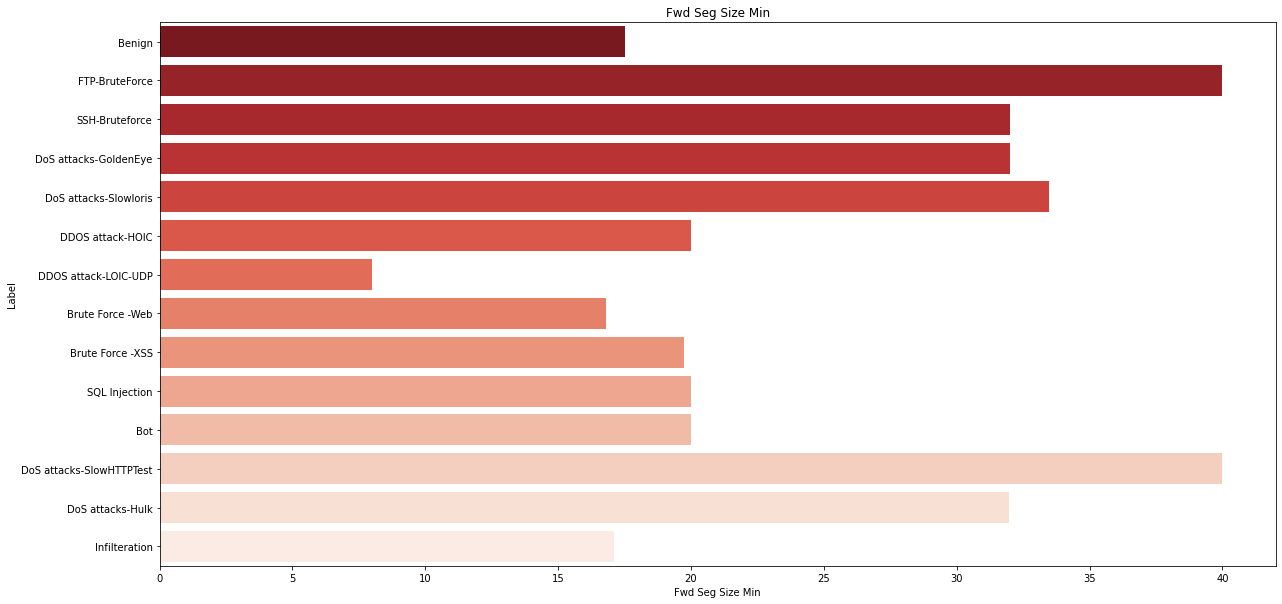

In [ ]:
# Label - Fwd Seg Size Min mean
target = 'Fwd Seg Size Min'
print(df_label_mean_target[target])
plt.figure(figsize=(20, 10))
sns.barplot(x=df_label_mean_target[target], y=df_label_mean_target.index, palette='Reds_r')
plt.title(target)
plt.show()

Label
Benign                      3.323199e+04
FTP-BruteForce              1.189161e+06
SSH-Bruteforce              1.585211e+05
DoS attacks-GoldenEye       8.728737e+00
DoS attacks-Slowloris       6.529194e+04
DDOS attack-HOIC            9.483728e+02
DDOS attack-LOIC-UDP        1.078145e+03
Brute Force -Web            1.393420e+04
Brute Force -XSS            8.071957e+03
SQL Injection               2.398271e+04
Bot                         2.236534e+03
DoS attacks-SlowHTTPTest    7.347001e+05
DoS attacks-Hulk            1.208640e+03
Infilteration               1.083024e+05
Name: Flow Pkts/s, dtype: float64


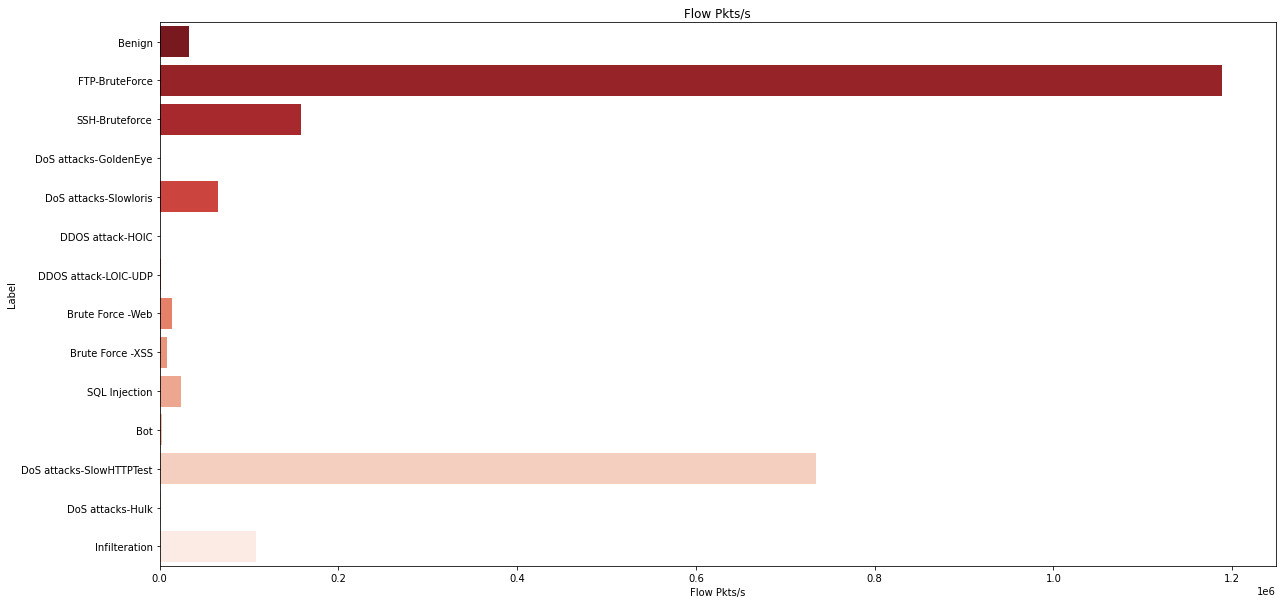

In [ ]:
# Label - Flow Pkts/s mean
target = 'Flow Pkts/s'
print(df_label_mean_target[target])
plt.figure(figsize=(20, 10))
sns.barplot(x=df_label_mean_target[target], y=df_label_mean_target.index, palette='Reds_r')
plt.title(target)
plt.show()

Label
Benign                      3.323199e+04
FTP-BruteForce              1.189161e+06
SSH-Bruteforce              1.585211e+05
DoS attacks-GoldenEye       8.728737e+00
DoS attacks-Slowloris       6.529194e+04
DDOS attack-HOIC            9.483728e+02
DDOS attack-LOIC-UDP        1.078145e+03
Brute Force -Web            1.393420e+04
Brute Force -XSS            8.071957e+03
SQL Injection               2.398271e+04
Bot                         2.236534e+03
DoS attacks-SlowHTTPTest    7.347001e+05
DoS attacks-Hulk            1.208640e+03
Infilteration               1.083024e+05
Name: Flow Pkts/s, dtype: float64


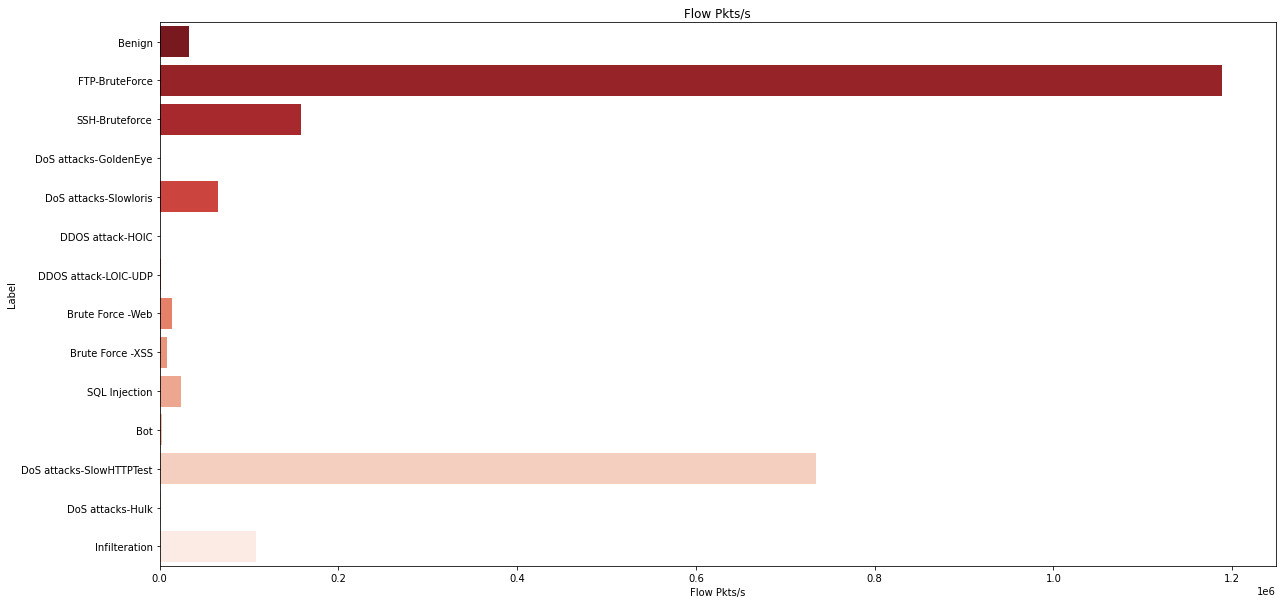

In [ ]:
# Label - Flow Byts/s mean
target = 'Flow Pkts/s'
print(df_label_mean_target[target])
plt.figure(figsize=(20, 10))
sns.barplot(x=df_label_mean_target[target], y=df_label_mean_target.index, palette='Reds_r')
plt.title(target)
plt.show()

Label
Benign                      3.323199e+04
FTP-BruteForce              1.189161e+06
SSH-Bruteforce              1.585211e+05
DoS attacks-GoldenEye       8.728737e+00
DoS attacks-Slowloris       6.529194e+04
DDOS attack-HOIC            9.483728e+02
DDOS attack-LOIC-UDP        1.078145e+03
Brute Force -Web            1.393420e+04
Brute Force -XSS            8.071957e+03
SQL Injection               2.398271e+04
Bot                         2.236534e+03
DoS attacks-SlowHTTPTest    7.347001e+05
DoS attacks-Hulk            1.208640e+03
Infilteration               1.083024e+05
Name: Flow Pkts/s, dtype: float64


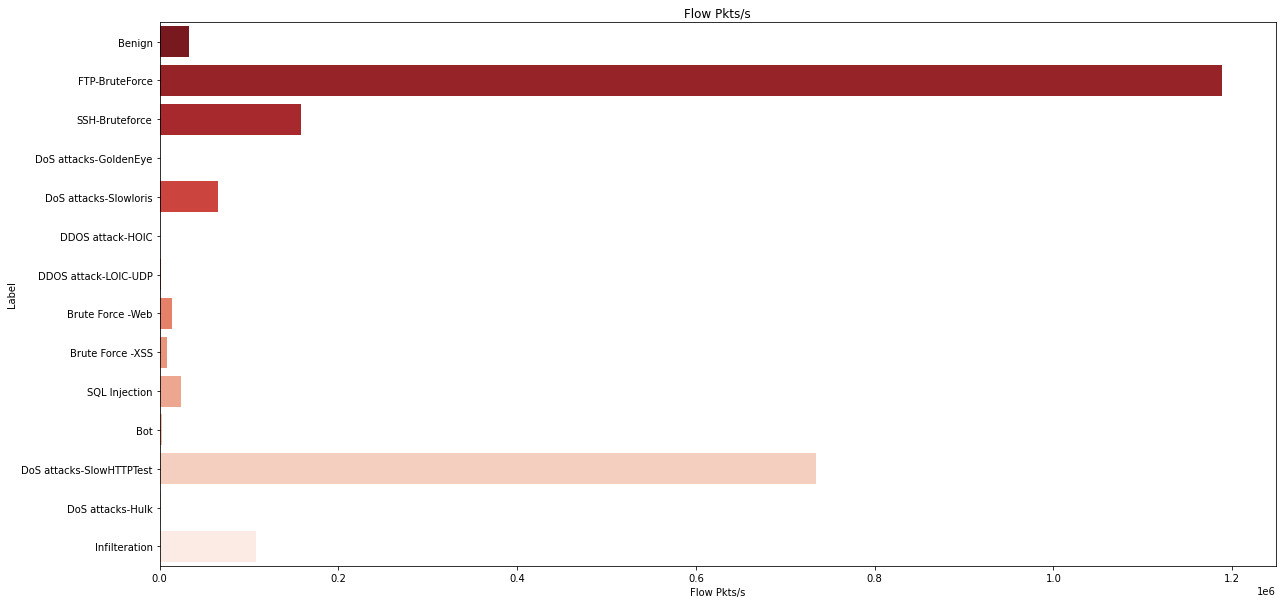

In [ ]:
# Label - Flow Byts/s mean
target = 'Flow Pkts/s'
print(df_label_mean_target[target])
plt.figure(figsize=(20, 10))
sns.barplot(x=df_label_mean_target[target], y=df_label_mean_target.index, palette='Reds_r')
plt.title(target)
plt.show()

Label
Benign                           2.061518
FTP-BruteForce                   0.000000
SSH-Bruteforce                   8.001471
DoS attacks-GoldenEye            0.837790
DoS attacks-Slowloris            5.004368
DDOS attack-HOIC                 0.238698
DDOS attack-LOIC-UDP        117350.428902
Brute Force -Web                22.559738
Brute Force -XSS                47.695652
SQL Injection                    0.942529
Bot                              0.511606
DoS attacks-SlowHTTPTest         0.000000
DoS attacks-Hulk                 0.059113
Infilteration                    2.000697
Name: Fwd Act Data Pkts, dtype: float64


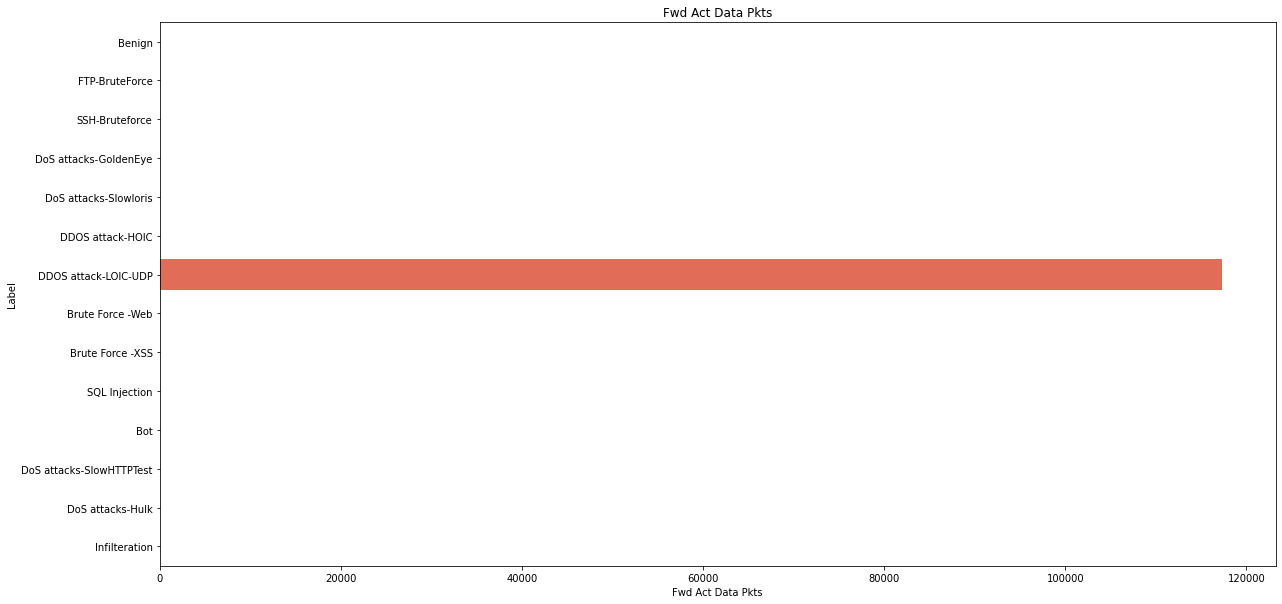

In [ ]:
# Label - Fwd Act Data Pkts mean
target = 'Fwd Act Data Pkts'
print(df_label_mean_target[target])
plt.figure(figsize=(20, 10))
sns.barplot(x=df_label_mean_target[target], y=df_label_mean_target.index, palette='Reds_r')
plt.title(target)
plt.show()

Label
Benign                      1.091602e+05
FTP-BruteForce              0.000000e+00
SSH-Bruteforce              0.000000e+00
DoS attacks-GoldenEye       1.355013e+05
DoS attacks-Slowloris       2.594140e+06
DDOS attack-HOIC            0.000000e+00
DDOS attack-LOIC-UDP        0.000000e+00
Brute Force -Web            8.249576e+05
Brute Force -XSS            6.956786e+04
SQL Injection               0.000000e+00
Bot                         8.750676e+00
DoS attacks-SlowHTTPTest    0.000000e+00
DoS attacks-Hulk            4.428860e+01
Infilteration               3.011945e+05
Name: Active Mean, dtype: float64


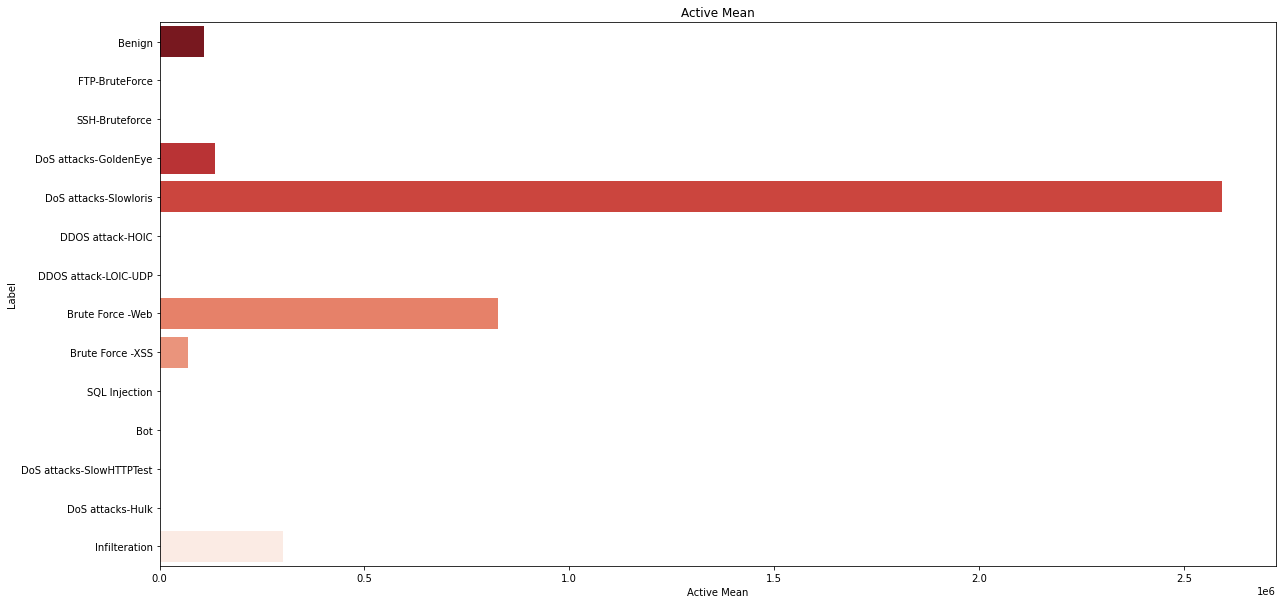

In [ ]:
# Label - Active Mean mean
target = 'Active Mean'
print(df_label_mean_target[target])
plt.figure(figsize=(20, 10))
sns.barplot(x=df_label_mean_target[target], y=df_label_mean_target.index, palette='Reds_r')
plt.title(target)
plt.show()

#### Label - Min value Vis

In [ ]:
# Label
df_label_min = df.groupby('Label').min()
df_label_min

Dst Port  Protocol  ... Idle Min  dayofweek
Label                                         ...                    
Benign                           0         0  ...      0.0          2
FTP-BruteForce                  21         6  ...      0.0          2
SSH-Bruteforce                  21         6  ...      0.0          2
DoS attacks-GoldenEye           80         6  ...      0.0          3
DoS attacks-Slowloris           80         6  ...      0.0          3
DDOS attack-HOIC                80         6  ...      0.0          2
DDOS attack-LOIC-UDP            80        17  ...      0.0          2
Brute Force -Web                 0         0  ...      0.0          3
Brute Force -XSS                67         6  ...      0.0          3
SQL Injection                   80         6  ...      0.0          3
Bot                              0         0  ...      0.0          4
DoS attacks-SlowHTTPTest        21         6  ...      0.0          4
DoS attacks-Hulk                80         6  ...      0.0          4
Infilteration                    0         0  ...      0.0          2

[14 rows x 80 columns]

Label
Benign                          1
FTP-BruteForce                  1
SSH-Bruteforce                  1
DoS attacks-GoldenEye          21
DoS attacks-Slowloris           1
DDOS attack-HOIC                2
DDOS attack-LOIC-UDP        61002
Brute Force -Web                6
Brute Force -XSS               13
SQL Injection                  12
Bot                           236
DoS attacks-SlowHTTPTest        1
DoS attacks-Hulk                2
Infilteration                   1
Name: Flow Duration, dtype: int64


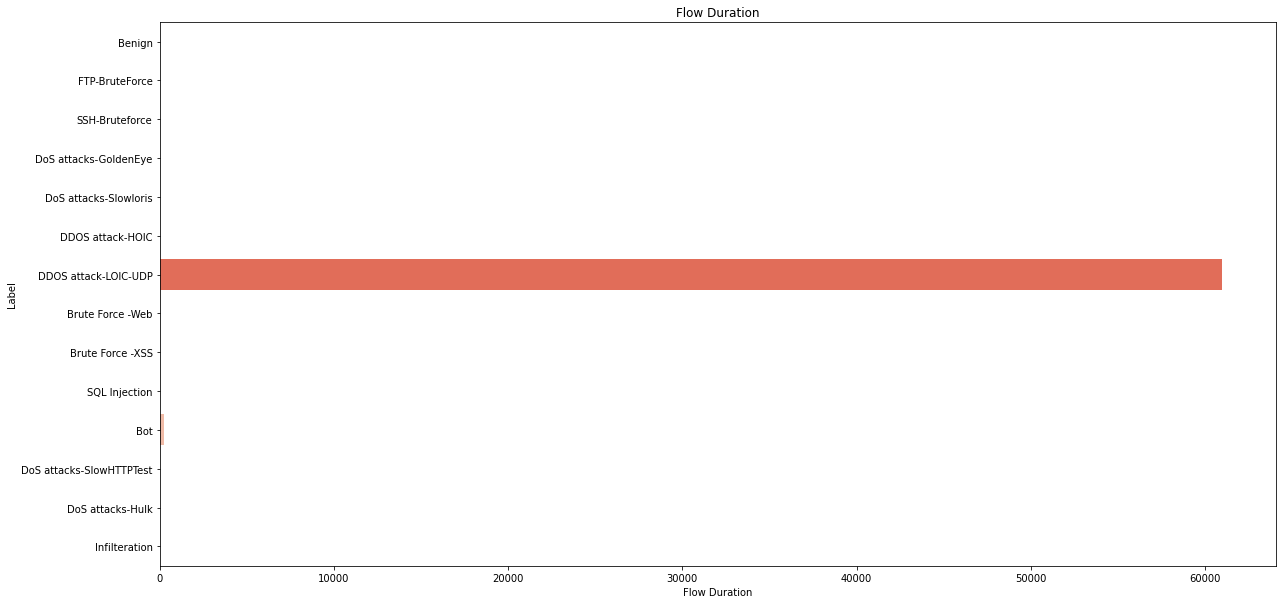

In [ ]:
# Label - Flow Duration min
target = 'Flow Duration'
print(df_label_min[target])
plt.figure(figsize=(20, 10))
sns.barplot(x=df_label_min[target], y=df_label_min.index, palette='Reds_r')
plt.title(target)
plt.show()

Label
Benign                        1
FTP-BruteForce                1
SSH-Bruteforce                1
DoS attacks-GoldenEye         1
DoS attacks-Slowloris         1
DDOS attack-HOIC              2
DDOS attack-LOIC-UDP        714
Brute Force -Web              1
Brute Force -XSS              1
SQL Injection                 2
Bot                           1
DoS attacks-SlowHTTPTest      1
DoS attacks-Hulk              2
Infilteration                 1
Name: Tot Fwd Pkts, dtype: int64


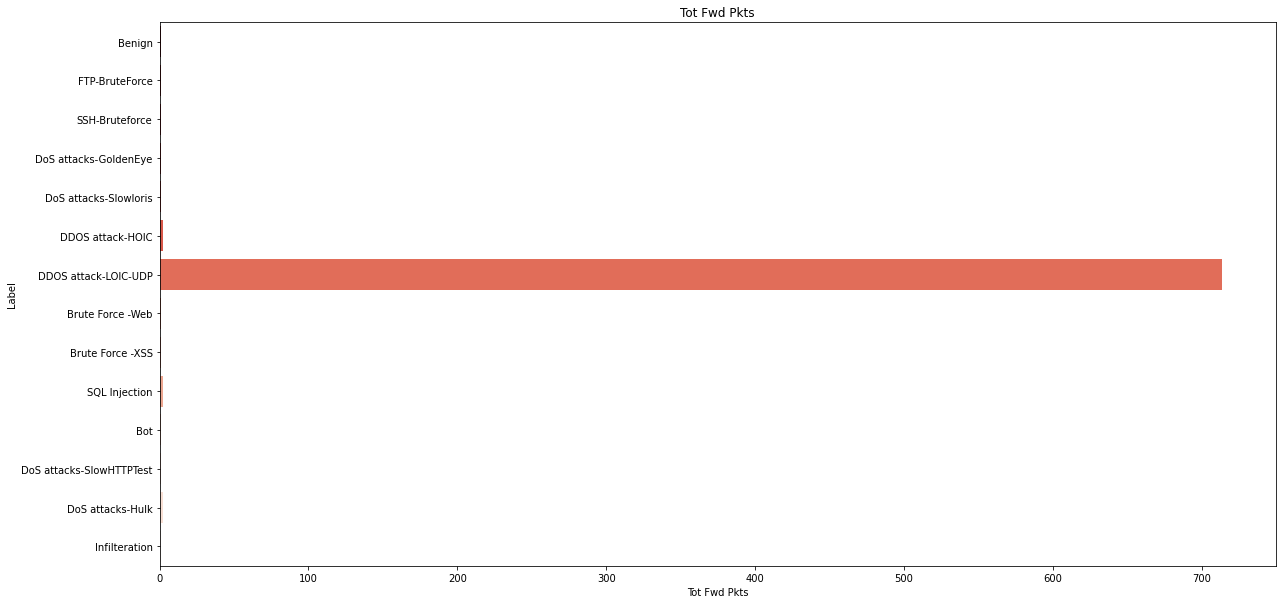

In [ ]:
# Label - Tot Fwd Pkts min
target = 'Tot Fwd Pkts'
print(df_label_min[target])
plt.figure(figsize=(20, 10))
sns.barplot(x=df_label_min[target], y=df_label_min.index, palette='Reds_r')
plt.title(target)
plt.show()

Label
Benign                      0
FTP-BruteForce              1
SSH-Bruteforce              0
DoS attacks-GoldenEye       0
DoS attacks-Slowloris       0
DDOS attack-HOIC            0
DDOS attack-LOIC-UDP        0
Brute Force -Web            0
Brute Force -XSS            0
SQL Injection               0
Bot                         0
DoS attacks-SlowHTTPTest    1
DoS attacks-Hulk            0
Infilteration               0
Name: Tot Bwd Pkts, dtype: int64


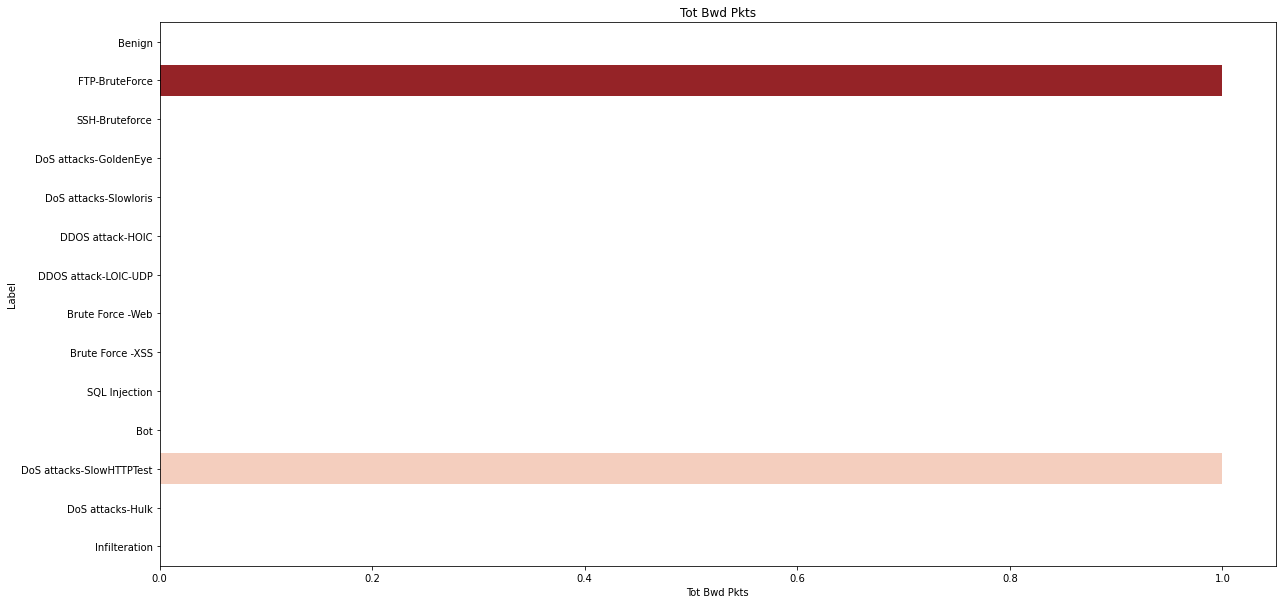

In [ ]:
# Label - Tot Bwd Pkts min
target = 'Tot Bwd Pkts'
print(df_label_min[target])
plt.figure(figsize=(20, 10))
sns.barplot(x=df_label_min[target], y=df_label_min.index, palette='Reds_r')
plt.title(target)
plt.show()

Label
Benign                          0.016667
FTP-BruteForce              31746.031746
SSH-Bruteforce                 51.052967
DoS attacks-GoldenEye           0.023246
DoS attacks-Slowloris           0.025816
DDOS attack-HOIC               22.596062
DDOS attack-LOIC-UDP          501.615967
Brute Force -Web                0.026633
Brute Force -XSS                0.067054
SQL Injection                   0.798353
Bot                             0.077454
DoS attacks-SlowHTTPTest    28571.428570
DoS attacks-Hulk                0.120882
Infilteration                   0.016812
Name: Flow Pkts/s, dtype: float64


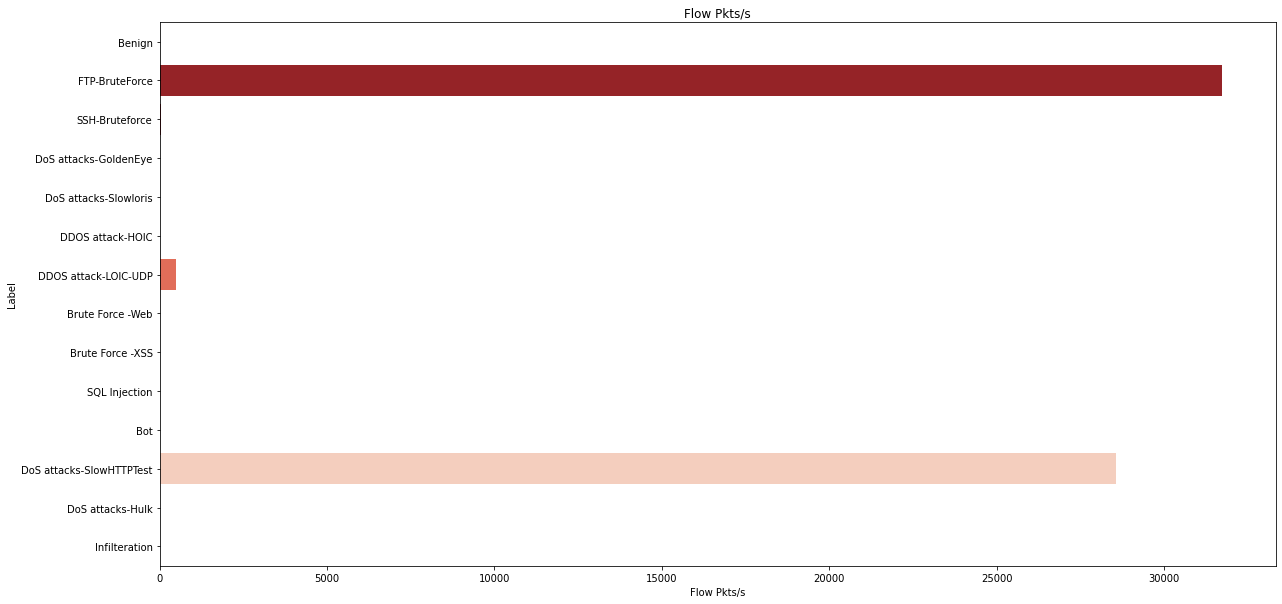

In [ ]:
# Label - Flow Pkts/s min
target = 'Flow Pkts/s'
print(df_label_min[target])
plt.figure(figsize=(20, 10))
sns.barplot(x=df_label_min[target], y=df_label_min.index, palette='Reds_r')
plt.title(target)
plt.show()

Label
Benign                      0.0
FTP-BruteForce              0.0
SSH-Bruteforce              0.0
DoS attacks-GoldenEye       0.0
DoS attacks-Slowloris       0.0
DDOS attack-HOIC            0.0
DDOS attack-LOIC-UDP        0.0
Brute Force -Web            0.0
Brute Force -XSS            0.0
SQL Injection               0.0
Bot                         0.0
DoS attacks-SlowHTTPTest    0.0
DoS attacks-Hulk            0.0
Infilteration               0.0
Name: Idle Mean, dtype: float64


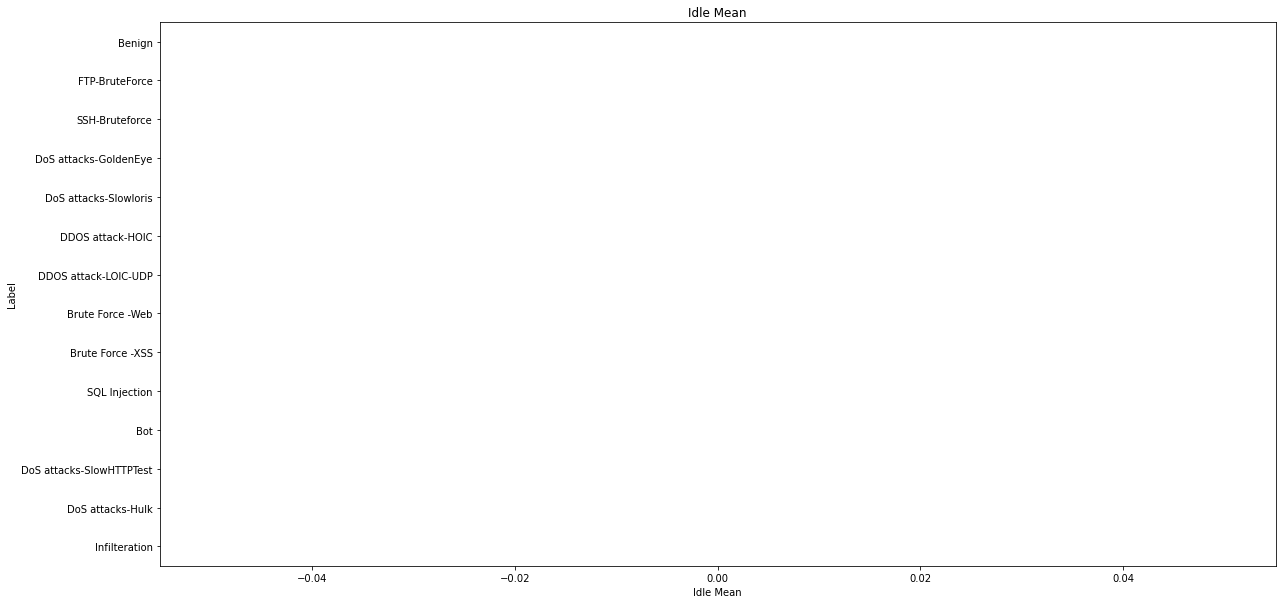

In [ ]:
# Label - Idle Mean min
target = 'Idle Mean'
print(df_label_min[target])
plt.figure(figsize=(20, 10))
sns.barplot(x=df_label_min[target], y=df_label_min.index, palette='Reds_r')
plt.title(target)
plt.show()

#### Normal / Abnormal Compared

##### Mean

In [ ]:
df_mean_new = df.groupby('new_label').mean()
df_mean_new

/usr/local/lib/python3.7/dist-packages/dask/dataframe/core.py:3073: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('Label', 'object'))

  warnings.warn(meta_warning(meta))
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker


Dst Port  Protocol  Flow Duration  ...   Idle Max   Idle Min  dayofweek
new_label                                     ...                                 
Abnormal    1817.59      6.26     1615089.46  ...  726164.42  591752.09       2.89
Normal     13901.02      8.86    14281402.05  ... 5956988.57 5691984.38       3.11

[2 rows x 79 columns]

In [ ]:
col = ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Flow Byts/s', 'Fwd Pkt Len Mean',
       'Bwd Pkt Len Mean', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Fwd IAT Min', 'Fwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Min',
       'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Mean', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Min', 'Idle Mean', 'Idle Min']
len(col)

30

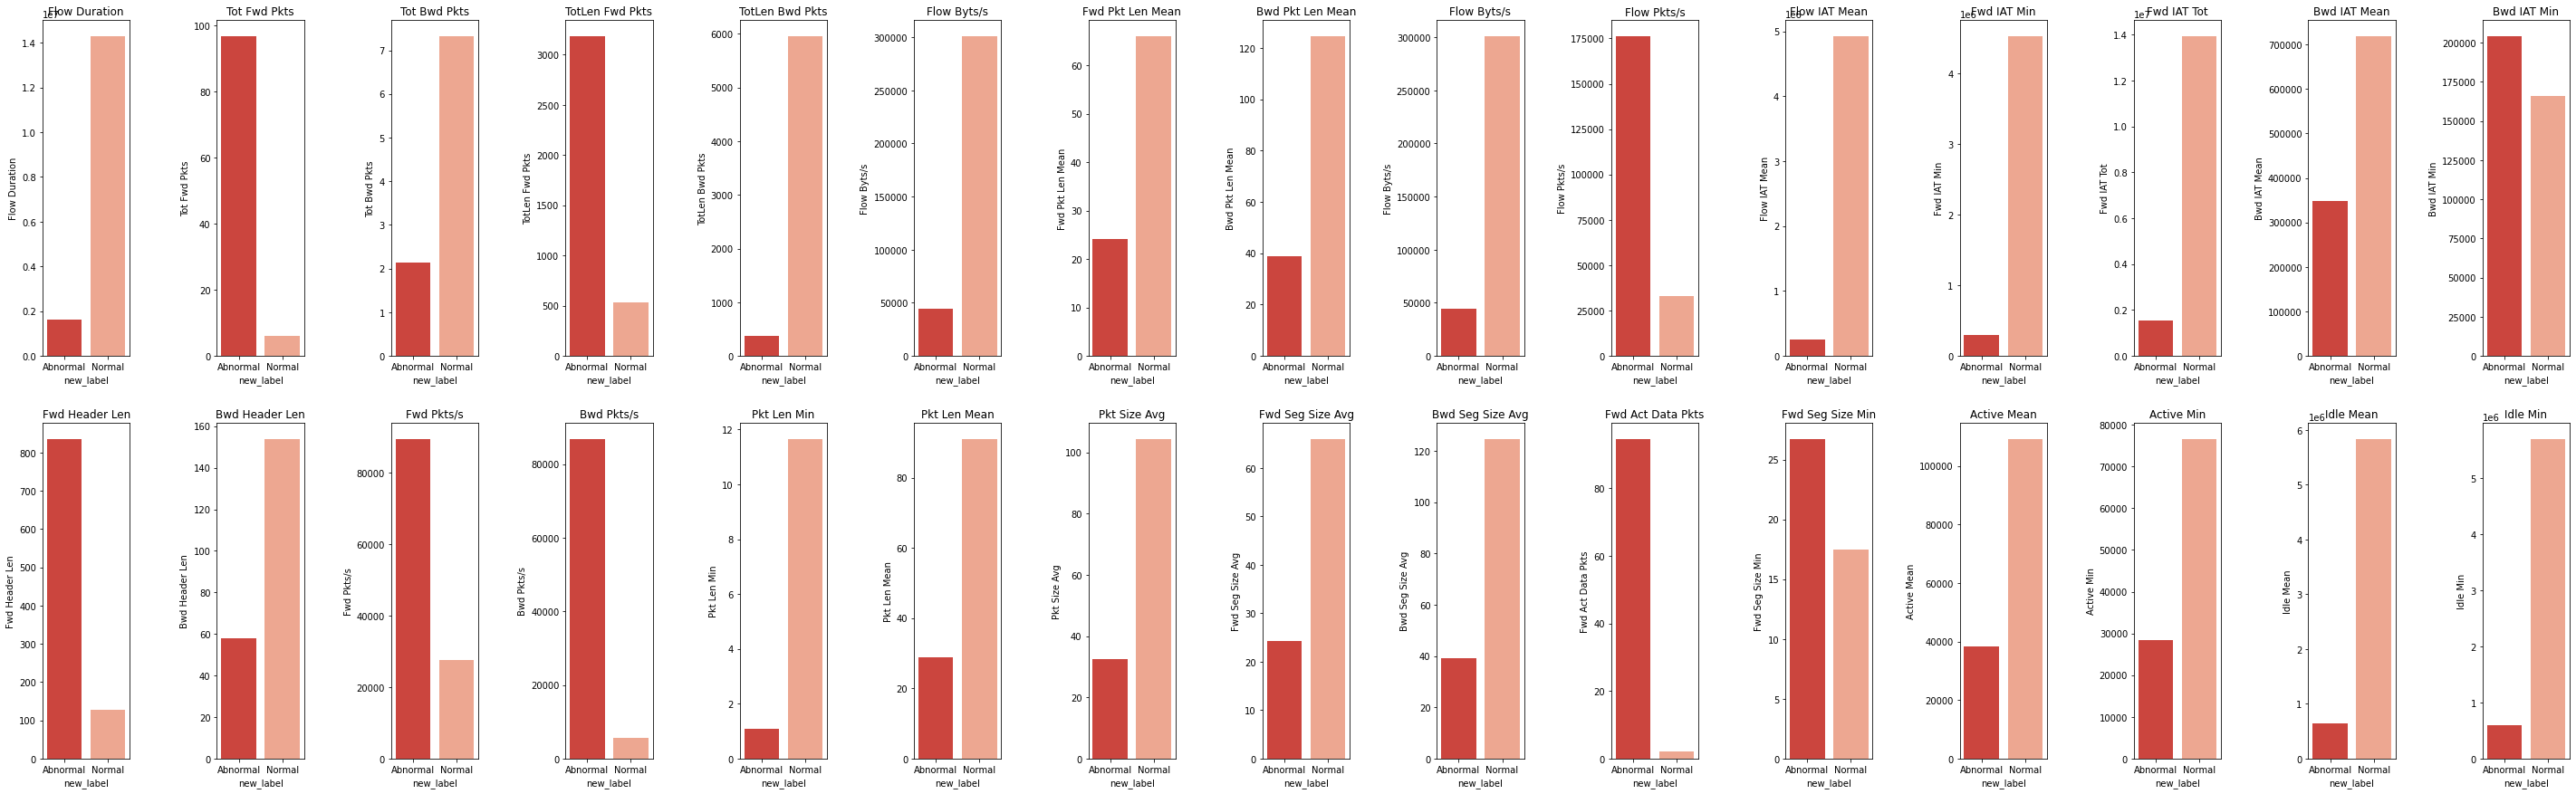

In [ ]:
col = ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Flow Byts/s', 'Fwd Pkt Len Mean',
       'Bwd Pkt Len Mean', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Fwd IAT Min', 'Fwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Min',
       'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Mean', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Min', 'Idle Mean', 'Idle Min']

fig, axes = plt.subplots(2, 15, figsize=(50, 15))
plt.subplots_adjust(wspace=1) 

for i in range(30):
  target = df_mean_new[col[i]]
  if i < 15:
    sns.barplot(x=df_mean_new.index, y=target, palette='Reds_r', ax=axes[0, i])
    axes[0, i].set_title(col[i])
  else:
    sns.barplot(x=df_mean_new.index, y=target, palette='Reds_r', ax=axes[1, i-15])
    axes[1, i-15].set_title(col[i])

##### Min

In [ ]:
df_min_new = df.groupby('new_label').min().compute()
df_min_new

Dst Port  Protocol            Timestamp  Flow Duration  \
new_label                                                           
Abnormal          0         0  01/03/2018 02:00:00              1   
Normal            0         0  01/03/2018 01:00:00              1   

           Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  \
new_label                                                                 
Abnormal              1             0                0             0.00   
Normal                1             0                0             0.00   

           Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
new_label                                                       
Abnormal                 0                0              0.00   
Normal                   0                0              0.00   

           Fwd Pkt Len Std  Bwd Pkt Len Max  Bwd Pkt Len Min  \
new_label                                                      
Abnormal              0.00                0                0   
Normal                0.00                0                0   

           Bwd Pkt Len Mean  Bwd Pkt Len Std  Flow Byts/s  Flow Pkts/s  \
new_label                                                                
Abnormal               0.00             0.00         0.00         0.02   
Normal                 0.00             0.00         0.00         0.02   

           Flow IAT Mean  Flow IAT Std  Flow IAT Max  Flow IAT Min  \
new_label                                                            
Abnormal            0.40          0.00          1.00          0.00   
Normal              0.33          0.00          1.00          0.00   

           Fwd IAT Tot  Fwd IAT Mean  Fwd IAT Std  Fwd IAT Max  Fwd IAT Min  \
new_label                                                                     
Abnormal          0.00          0.00         0.00         0.00         0.00   
Normal            0.00          0.00         0.00         0.00         0.00   

           Bwd IAT Tot  Bwd IAT Mean  Bwd IAT Std  Bwd IAT Max  Bwd IAT Min  \
new_label                                                                     
Abnormal          0.00          0.00         0.00         0.00         0.00   
Normal            0.00          0.00         0.00         0.00         0.00   

           Fwd PSH Flags  Bwd PSH Flags  Fwd URG Flags  Bwd URG Flags  \
new_label                                                               
Abnormal               0              0              0              0   
Normal                 0              0              0              0   

           Fwd Header Len  Bwd Header Len  Fwd Pkts/s  Bwd Pkts/s  \
new_label                                                           
Abnormal                0               0        0.02        0.00   
Normal                  0               0        0.01        0.00   

           Pkt Len Min  Pkt Len Max  Pkt Len Mean  Pkt Len Std  Pkt Len Var  \
new_label                                                                     
Abnormal             0            0          0.00         0.00         0.00   
Normal               0            0          0.00         0.00         0.00   

           FIN Flag Cnt  SYN Flag Cnt  RST Flag Cnt  PSH Flag Cnt  \
new_label                                                           
Abnormal              0             0             0             0   
Normal                0             0             0             0   

           ACK Flag Cnt  URG Flag Cnt  CWE Flag Count  ECE Flag Cnt  \
new_label                                                             
Abnormal              0             0               0             0   
Normal                0             0               0             0   

           Down/Up Ratio  Pkt Size Avg  Fwd Seg Size Avg  Bwd Seg Size Avg  \
new_label                                                                    
Abnormal               0          0.00              0.00              0.00   
Normal              

### Port check
- Num of Dst Port : 64,106
- The most frequent port : 80, 53
- Port별로 데이터 특성이 차이가 크게 나타난다.
- Attack은 종류별로 특정 Port에서 나타나는 것으로 나타난다. 

※ Port별 특징
  - 21 : FTP 파일 전송 프로토콜 : 서버와 클라이언트 사이의 파일 전송을 하기위한 프로토콜
  - 22 : SSH 시큐어 셀 : 다른 사용자가 세션을 엿듣지 못하도록 세션을 감싸 보안 및 안정성을 높임
  - 80 : HTTP : HyperText Transfer Protocao
  - 443 : HTTPS(SSL) : HyperText Transfer Protocol over Secure Socket Layer : 월드와이드웹 통신 프로토콜인 HTTP의 보안이 강화된 버전
  - 3389 : RDP : 윈도우 PC 원격데스크탑 연결
  - 8080 : 다른 포트로 서비스를 할때에 주로 쓰는 번호가 8080 
  - 53 : DNS(도메인 이름 시스템)사용포트 
  - 5355 : LLMNR(Link Local Multicast Name Resolution) 로컬상에서 쓰이는 DNS, DNS는 www.naver.com, www.daum.net 을 아이피주소를 바꿔주는 역할인데, LLMNR은 운영체제 기반에 host 네임이 있는데 이 호스트 네임을 아이피로 바꿔주는 역할을 한다.
  - 137 : NetBIOS 이름 확인
  - UDP 137번포트는 랜섬웨어가 윈도우 허점을 이용해 들어오는 포트였음
  - 138 : NetBIOS 데이터그램 서비스
  - 67 : 	BOOTP (부트스트랩 프로토콜) 서버. DHCP로도 사용
  - 80 : HTTP : HyperText Transfer Protocao
  - 123 : NTP (Network Time Protocol) - 시간 동기화

In [ ]:
# Port
df_port_value = df['Dst Port'].value_counts()
print(df_port_value)

80       2030632
53       1614231
443       805689
3389      744365
21        333577
          ...   
44251          1
25909          1
4024           1
36175          1
65535          1
Name: Dst Port, Length: 64106, dtype: int64


In [ ]:
# Port별 benign의 특성 평균 
df_benign = df[df['Label']=='Benign']
df_port_mean = df_benign.groupby('Dst Port').mean()
df_port_mean

Protocol  Flow Duration  ...    Idle Min  dayofweek
Dst Port                           ...                       
0             0.00    85893146.82  ... 38572823.16       3.08
22            6.00     6486762.17  ...  1604195.50       2.70
67           17.00     2829229.59  ...   238373.00       3.07
80            6.02    23505001.02  ...  1426030.39       3.17
443           6.00    44884744.15  ... 14169857.52       3.01
...            ...            ...  ...         ...        ...
43133         6.00    86380803.00  ... 86400000.00       3.00
44003         6.00    86346865.00  ... 86300000.00       3.00
46005         6.00     1307829.00  ...        0.00       3.00
47583         6.00    86265984.00  ... 86300000.00       3.00
48923         6.00    88212940.00  ... 88200000.00       3.00

[64092 rows x 78 columns]

In [ ]:
# 11개 특성 선택
selected_col = ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'Flow Byts/s', 'Flow Pkts/s', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Idle Mean']
df_port_mean_selected = df_port_mean[selected_col]
df_port_mean_selected

Flow Duration  Tot Fwd Pkts  ...  Active Mean   Idle Mean
Dst Port                               ...                         
0           85893146.82          8.99  ...   2549445.61 39077186.01
22           6486762.17          6.20  ...    956582.30  1931082.89
67           2829229.59          1.24  ...    188882.64   488954.56
80          23505001.02          6.76  ...     39646.64  1482171.01
443         44884744.15         17.59  ...    306416.55 14922646.14
...                 ...           ...  ...          ...         ...
43133       86380803.00          2.00  ...         0.00 86400000.00
44003       86346865.00          2.00  ...         0.00 86300000.00
46005        1307829.00          1.00  ...         0.00        0.00
47583       86265984.00          2.00  ...         0.00 86300000.00
48923       88212940.00          2.00  ...         0.00 88200000.00

[64092 rows x 11 columns]

In [ ]:
# 'Flow Duration'
df_port_mean_selected.sort_values(by='Flow Duration', ascending=False).head(10)

Flow Duration  Tot Fwd Pkts  ...  Active Mean   Idle Mean
Dst Port                               ...                         
48747      110748416.75         96.38  ...         0.00 21673452.25
20958       95013870.67          4.67  ...         0.00 75922430.00
3117        94961595.00          1.67  ...    959529.67 75732631.67
35943       94826278.00          2.00  ...         0.00 94812763.33
25848       94287749.67          4.67  ...         0.00 75166501.33
3544        93978219.77          3.92  ...    236298.87 35916833.96
37503       93552266.33          4.67  ...         0.00 74867823.33
21252       93438633.67          4.67  ...         0.00 74788540.00
14661       93340329.33          4.67  ...         0.00 74654126.67
6425        93324547.33          5.33  ...         0.00 74734187.33

[10 rows x 11 columns]

In [ ]:
# 'Flow Pkts/s'
df_port_mean_selected.sort_values(by='Flow Pkts/s', ascending=False).head(10)

Flow Duration  Tot Fwd Pkts  ...  Active Mean   Idle Mean
Dst Port                               ...                         
161              217.53          1.10  ...         0.00        0.00
880              242.96          1.00  ...         0.00        0.00
8021         7331746.97          1.10  ...         0.00  7329445.15
24842       57405279.00          2.67  ...         0.00 57419290.00
1248         3075868.64          1.05  ...         0.00  3075377.14
106              270.23          1.00  ...         0.00        0.00
1007             261.92          1.00  ...         0.00        0.00
31038        3128715.44          1.04  ...         0.00  3128639.64
9101         3078602.68          1.05  ...         0.00  3078382.96
91                 4.67          1.00  ...         0.00        0.00

[10 rows x 11 columns]

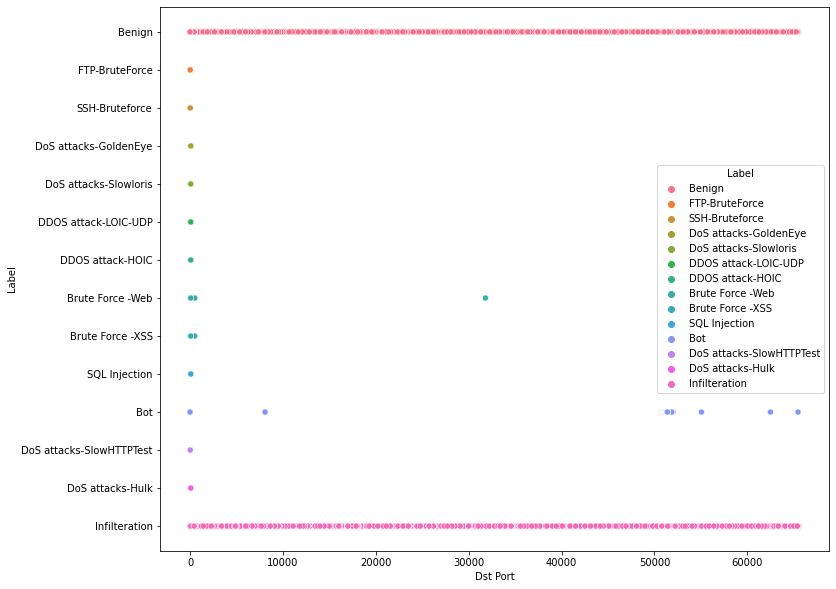

In [ ]:
# Port vs Label
plt.figure(figsize=(12,10))
sns.scatterplot(x='Dst Port',y = 'Label',hue='Label',data = fin_df)
plt.show()

- Benign을 제외하면 전체적으로 특정 포트에서 발생하고 있음

### Protocol check
- Num of Protocol : 3 (0, 6, 17)
- 0 : HOPORT, 6 : TCP, 17 : UDP
- 대부분의 공격이 TCP에서 일어나고 있다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


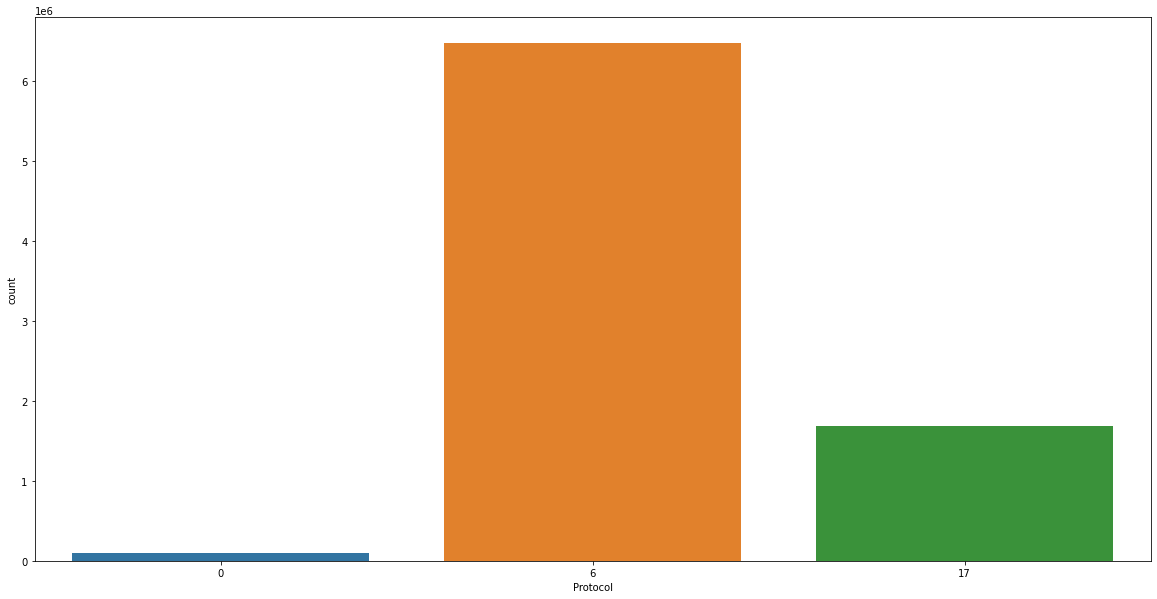

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.countplot(df['Protocol'])
plt.show()

In [ ]:
target = df[df['Label']=='Benign']['Protocol'].value_counts()
target

6     4353402
17    1632095
0       91632
Name: Protocol, dtype: int64

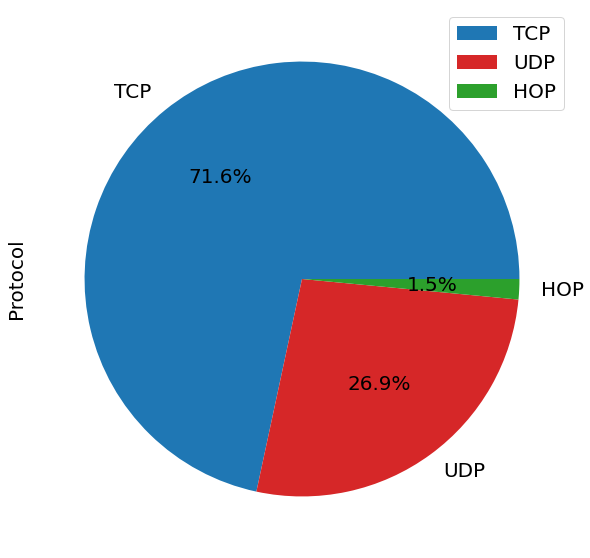

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
target = df[df['Label']=='Benign']['Protocol'].value_counts()
plt.figure(figsize=(10, 10))
target.plot(kind='pie',
            autopct='%1.1f%%',
            labels=['TCP', 'UDP', 'HOP'],
            colors=['tab:blue', 'tab:red', 'tab:green'],
            textprops={'size':20})
# plt.pie(target, labels=['TCP', 'UDP', 'HOP'])
plt.rc('font', size=20)
plt.legend(['TCP', 'UDP', 'HOP'])
plt.show()

In [ ]:
TCP = df[df['Protocol']==6]
UDP = df[df['Protocol']==17]
HOP = df[df['Protocol']==0]

In [ ]:
# TCP 일 때 공격유형의 개수 
TCP['Label'].value_counts()

Benign                      4353402
DDOS attack-HOIC             686012
DoS attacks-Hulk             461912
Bot                          285933
FTP-BruteForce               193354
SSH-Bruteforce               187589
DoS attacks-SlowHTTPTest     139890
Infilteration                107024
DoS attacks-GoldenEye         41508
DoS attacks-Slowloris         10990
Brute Force -Web                462
Brute Force -XSS                225
SQL Injection                    87
Name: Label, dtype: int64

Benign                      4353402
DDOS attack-HOIC             686012
DoS attacks-Hulk             461912
Bot                          285933
FTP-BruteForce               193354
SSH-Bruteforce               187589
DoS attacks-SlowHTTPTest     139890
Infilteration                107024
DoS attacks-GoldenEye         41508
DoS attacks-Slowloris         10990
Brute Force -Web                462
Brute Force -XSS                225
SQL Injection                    87
Name: Label, dtype: int64


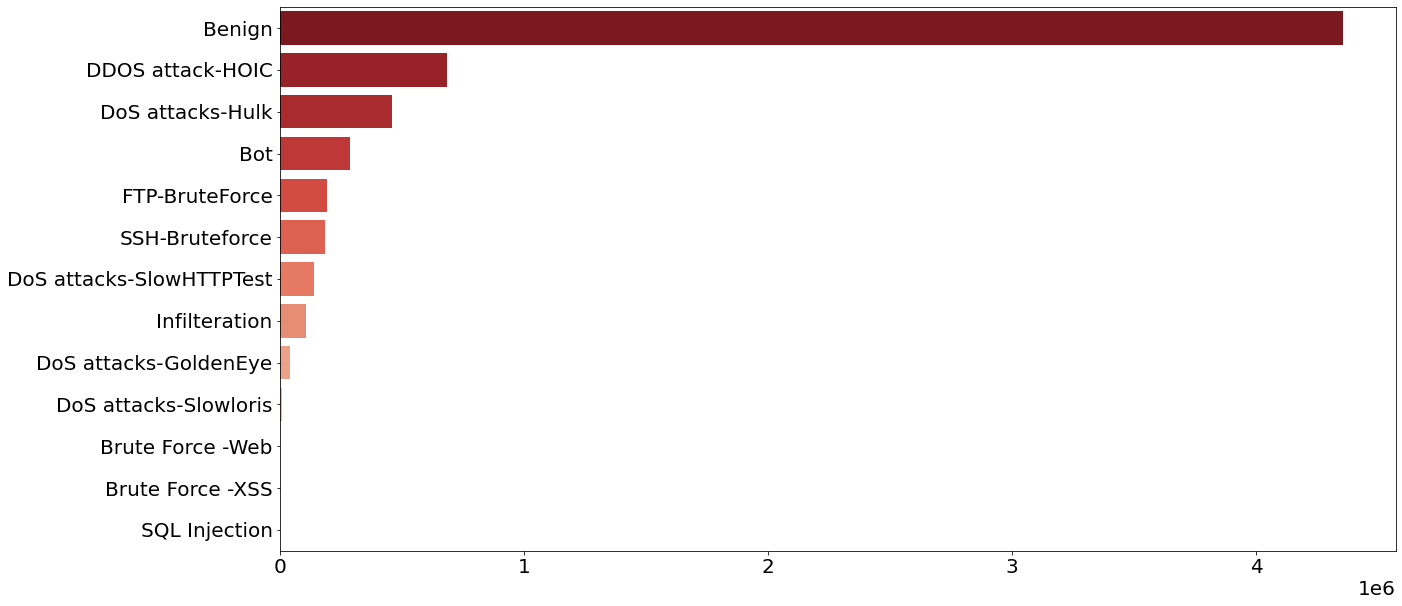

In [ ]:
# Label
import matplotlib.pyplot as plt
import seaborn as sns
label_num = TCP['Label'].value_counts()
print(label_num)
plt.figure(figsize=(20, 10))
sns.barplot(x=label_num.values, y=label_num.index, palette='Reds_r')
plt.rc('font', size=20)
plt.show()

In [ ]:
# UDP 일 때 공격유형의 개수 
UDP['Label'].value_counts()

Series([], Name: Label, dtype: int64)

In [ ]:
UDP.head()

Empty DataFrame
Columns: [Dst Port, Protocol, Flow Duration, Tot Fwd Pkts, Tot Bwd Pkts, TotLen Fwd Pkts, TotLen Bwd Pkts, Fwd Pkt Len Max, Fwd Pkt Len Min, Fwd Pkt Len Mean, Fwd Pkt Len Std, Bwd Pkt Len Max, Bwd Pkt Len Min, Bwd Pkt Len Mean, Bwd Pkt Len Std, Flow Byts/s, Flow Pkts/s, Flow IAT Mean, Flow IAT Std, Flow IAT Max, Flow IAT Min, Fwd IAT Tot, Fwd IAT Mean, Fwd IAT Std, Fwd IAT Max, Fwd IAT Min, Bwd IAT Tot, Bwd IAT Mean, Bwd IAT Std, Bwd IAT Max, Bwd IAT Min, Fwd PSH Flags, Bwd PSH Flags, Fwd URG Flags, Bwd URG Flags, Fwd Header Len, Bwd Header Len, Fwd Pkts/s, Bwd Pkts/s, Pkt Len Min, Pkt Len Max, Pkt Len Mean, Pkt Len Std, Pkt Len Var, FIN Flag Cnt, SYN Flag Cnt, RST Flag Cnt, PSH Flag Cnt, ACK Flag Cnt, URG Flag Cnt, CWE Flag Count, ECE Flag Cnt, Down/Up Ratio, Pkt Size Avg, Fwd Seg Size Avg, Bwd Seg Size Avg, Fwd Byts/b Avg, Fwd Pkts/b Avg, Fwd Blk Rate Avg, Bwd Byts/b Avg, Bwd Pkts/b Avg, Bwd Blk Rate Avg, Subflow Fwd Pkts, Subflow Fwd Byts, Subflow Bwd Pkts, Subflow Bwd Byts, Init Fwd Win Byts, Init Bwd Win Byts, Fwd Act Data Pkts, Fwd Seg Size Min, Active Mean, Active Std, Active Max, Active Min, Idle Mean, Idle Std, Idle Max, Idle Min, Label, Type]
Index: []

Benign                  1632095
Infilteration             51360
DDOS attack-LOIC-UDP       1730
Brute Force -Web            128
Brute Force -XSS              5
Name: Label, dtype: int64


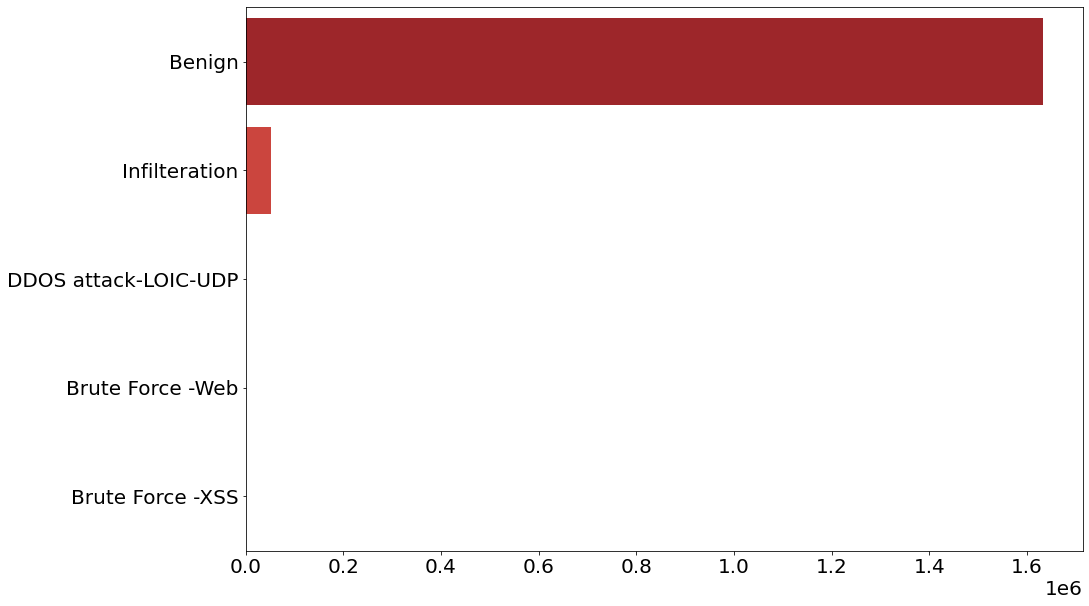

In [ ]:
# Label
import matplotlib.pyplot as plt
import seaborn as sns
label_num = UDP['Label'].value_counts()
print(label_num)
plt.figure(figsize=(15, 10))
sns.barplot(x=label_num.values, y=label_num.index, palette='Reds_r')
plt.rc('font', size=20)
plt.show()

In [ ]:
# HOP 일 때 공격유형의 개수 
HOP['Label'].value_counts()

Benign              91647
Infilteration        2255
Bot                   258
Brute Force -Web       21
Name: Label, dtype: int64

Benign              91632
Infilteration        2255
Bot                   258
Brute Force -Web       21
Name: Label, dtype: int64


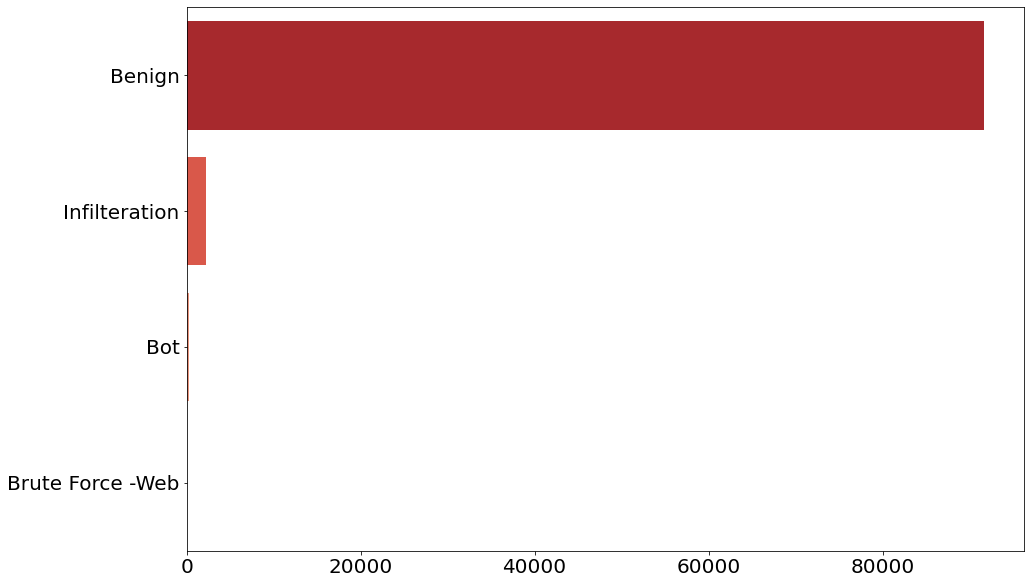

In [ ]:
# Label
import matplotlib.pyplot as plt
import seaborn as sns
label_num = HOP['Label'].value_counts()
print(label_num)
plt.figure(figsize=(15, 10))
sns.barplot(x=label_num.values, y=label_num.index, palette='Reds_r')
plt.rc('font', size=20)
plt.show()

#### TCP Detail

In [ ]:
TCP.describe()

Dst Port  Protocol  Flow Duration  ...   Idle Std    Idle Max    Idle Min
count  825485.0  825485.0       825485.0  ...   825485.0    825485.0    825485.0
mean     5890.8       6.0      9594042.4  ...   102559.2   2210718.3   2032426.8
std     15731.2       0.0     27496338.9  ...  1461849.8   9948297.2   9489452.6
min        12.0       6.0            1.0  ...        0.0         0.0         0.0
25%        22.0       6.0            6.0  ...        0.0         0.0         0.0
50%        80.0       6.0          571.0  ...        0.0         0.0         0.0
75%       445.0       6.0      1437323.0  ...        0.0         0.0         0.0
max     65533.0       6.0    119999989.0  ... 60509632.0 119217464.0 119217464.0

[8 rows x 78 columns]

In [ ]:
TCP['Dst Port'].value_counts()[:30]

80       2027304
443       806466
3389      742605
21        333583
8080      282029
445       281501
22        195230
135        14178
3128       12111
23          3919
139         3041
8545         873
30303        504
1433         434
2323         334
51040        333
1            324
50000        315
50500        314
50002        299
50300        296
50001        295
50006        294
50636        294
49999        291
50800        286
50003        286
50389        269
50454        261
51103        260
Name: Dst Port, dtype: int64

In [ ]:
# TCP의 포트중 1000개 이상 나타나는 데이터 시각화 진행

port_tcp = TCP[(TCP['Dst Port']==80)|(TCP['Dst Port']==443)|(TCP['Dst Port']==3389)|(TCP['Dst Port']==21)|(TCP['Dst Port']==8080)|(TCP['Dst Port']==445)
|(TCP['Dst Port']==22)|(TCP['Dst Port']==135)|(TCP['Dst Port']==3128)|(TCP['Dst Port']==23)|(TCP['Dst Port']==139)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


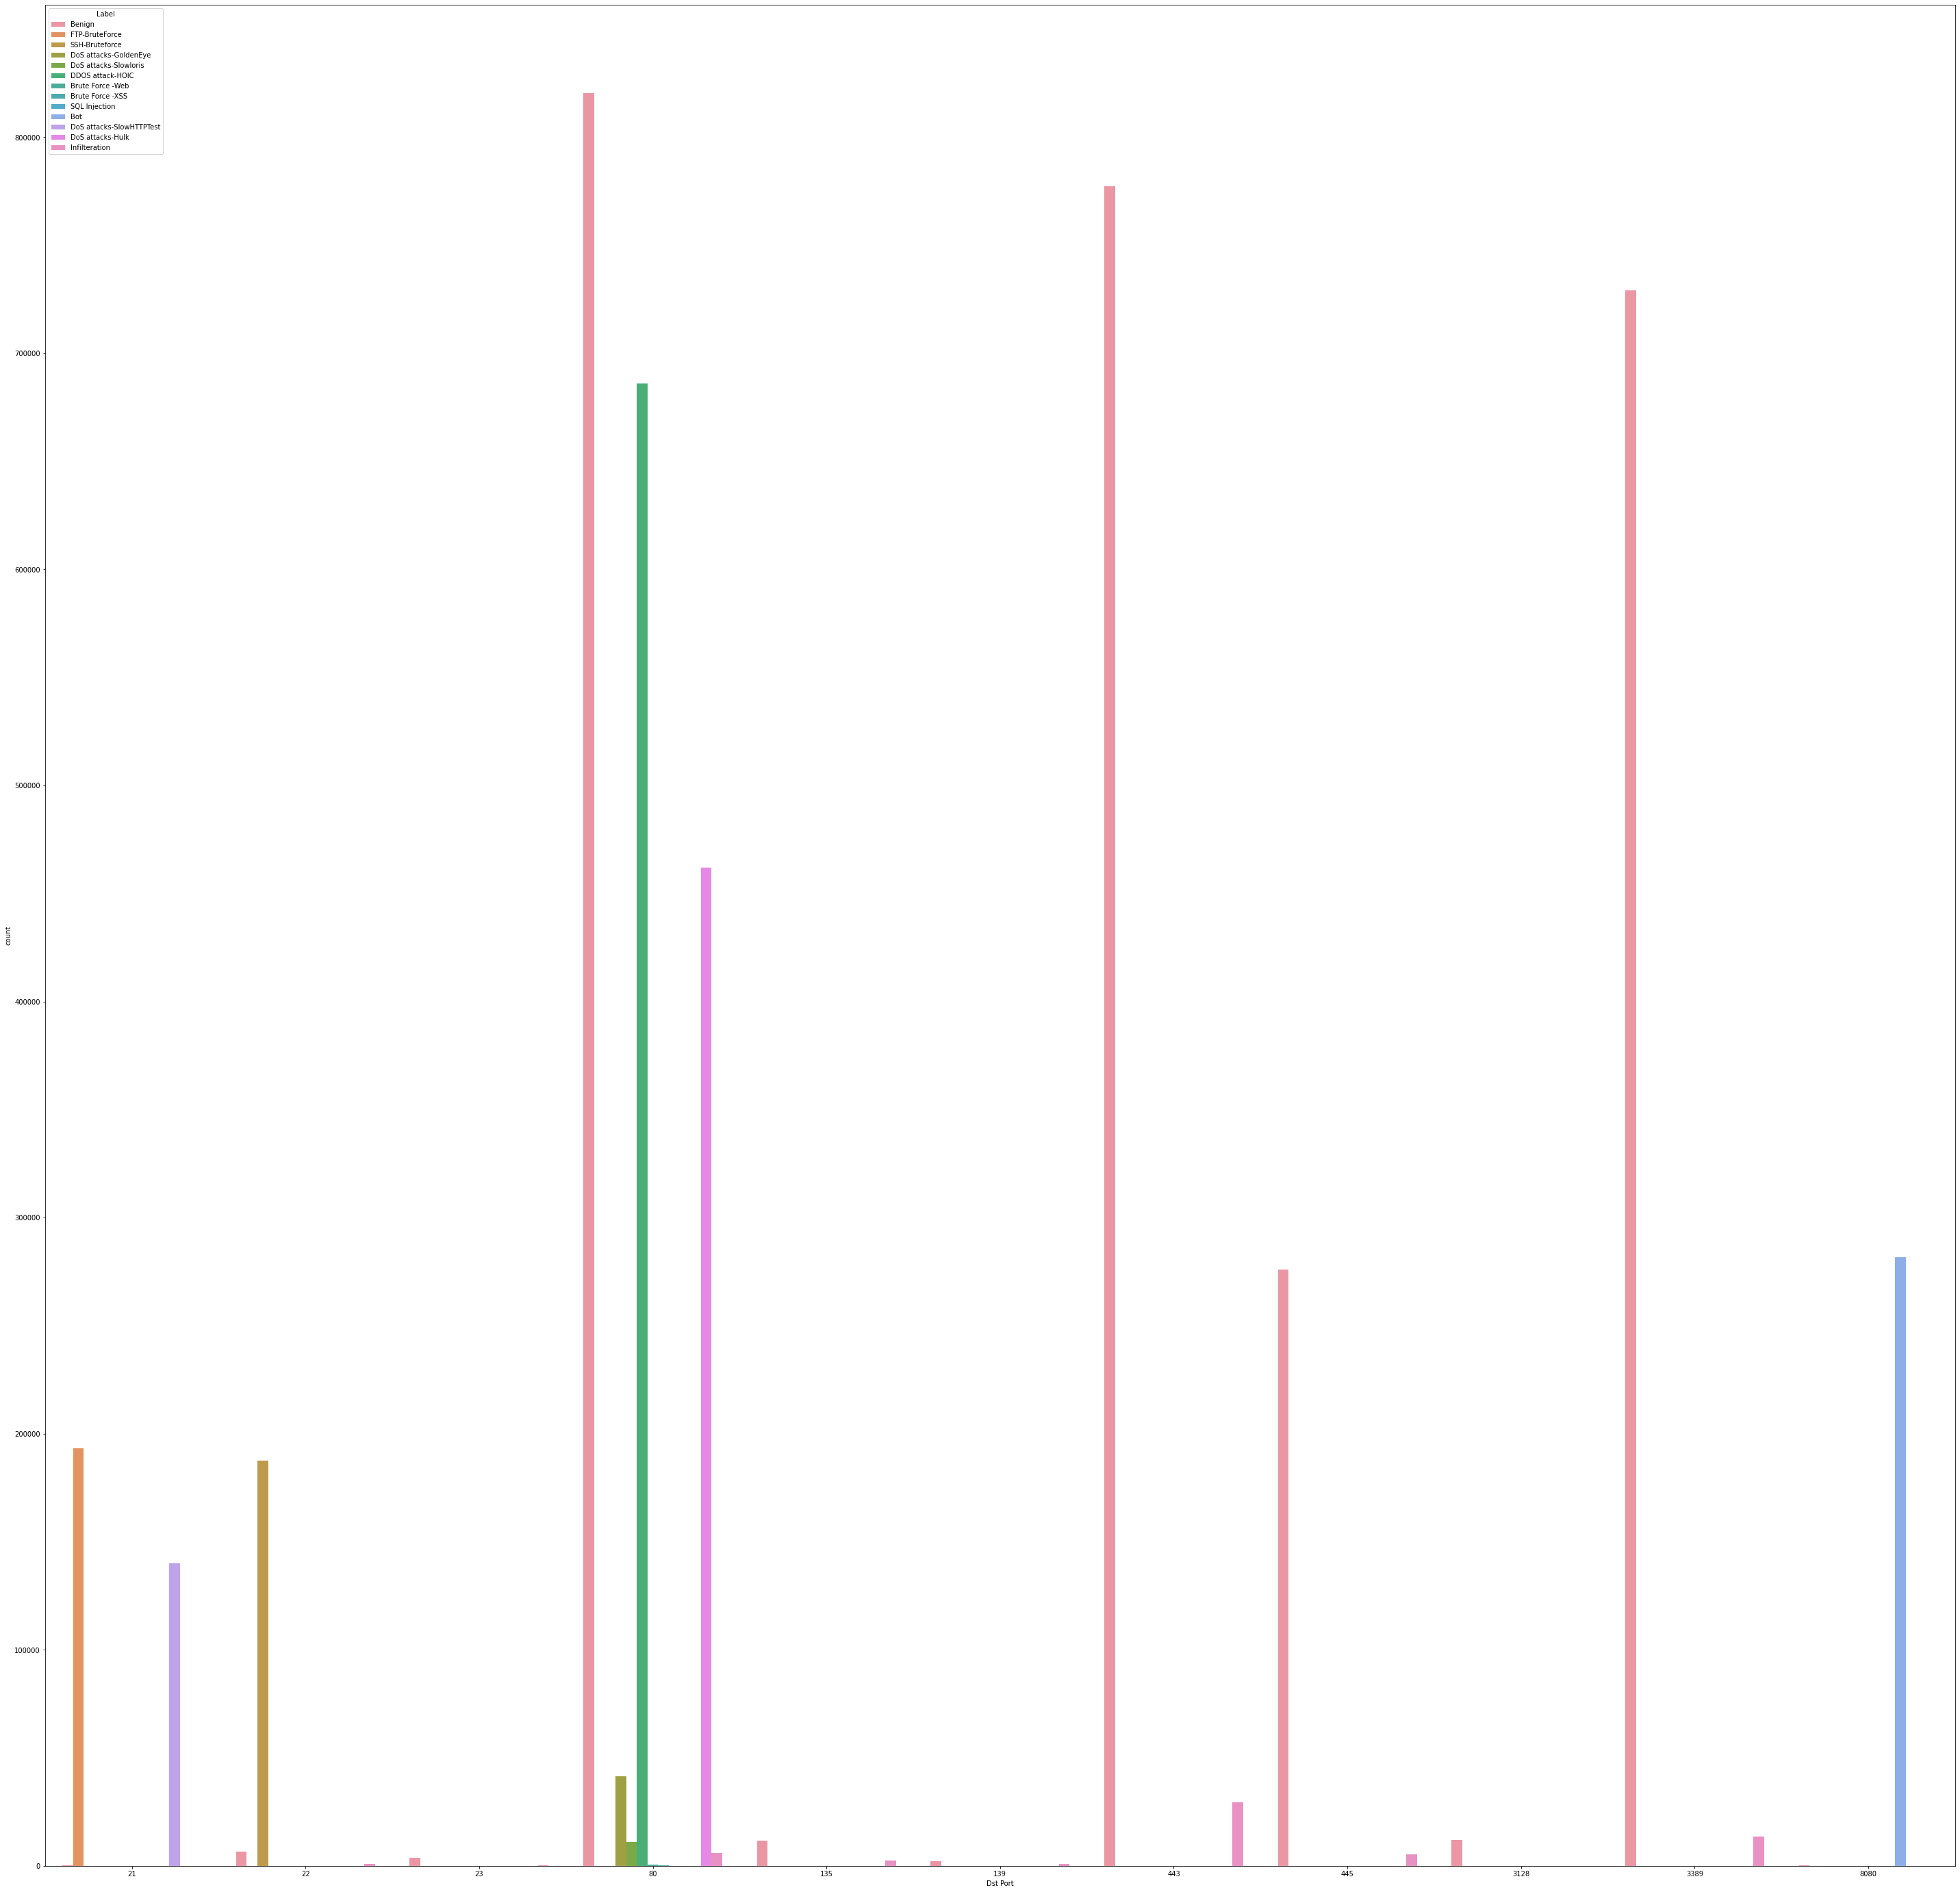

In [ ]:
# TCP의 상위 포트별 공격 개수 시각화
plt.figure(figsize=(50,50))
sns.countplot('Dst Port',hue='Label',data=port_tcp.compute())
plt.show()

In [ ]:
# TCP 의 상위 포트의 데이터 분석 (80~139)
idx = [80,443,3389,21,8080,445,22,135,3128,23,139]
for i in idx : 
  print('=========')
  print(i)
  print(TCP[TCP['Dst Port']==i]['Label'].value_counts())

80
Benign                   820283
DDOS attack-HOIC         686012
DoS attacks-Hulk         461912
DoS attacks-GoldenEye     41508
DoS attacks-Slowloris     10990
Infilteration              5827
Brute Force -Web            460
Brute Force -XSS            225
SQL Injection                87
Name: Label, dtype: int64
443
Benign           777204
Infilteration     29262
Name: Label, dtype: int64
3389
Benign           728976
Infilteration     13629
Name: Label, dtype: int64
21
FTP-BruteForce              193360
DoS attacks-SlowHTTPTest    139890
Benign                         268
Infilteration                   35
SSH-Bruteforce                  30
Name: Label, dtype: int64
8080
Bot              281634
Benign              359
Infilteration        36
Name: Label, dtype: int64
445
Benign           276036
Infilteration      5465
Name: Label, dtype: int64
22
SSH-Bruteforce      187559
Benign                6731
Infilteration          939
Brute Force -Web         1
Name: Label, dtype: int64
135


#### UDP & HOP 'Dst Port'


In [ ]:
UDP['Dst Port'].value_counts().compute()[:30]

53       1614138
5355       32095
137        14144
67          5462
500         5118
80          3328
123         3010
138         3000
3389        1760
1900         402
13186        266
49154        262
56391        221
3478         213
51877        210
30303        163
3544         109
49157         72
40468         60
49152         45
3702          23
49407         19
111           19
11211         15
49210         13
59712         12
49201         11
62151          8
161            8
6331           8
Name: Dst Port, dtype: int64

In [ ]:
HOP['Dst Port'].value_counts().compute()

0    94181
Name: Dst Port, dtype: int64

#### UDP와 HOP TOP9 'Dst Port'

In [ ]:
- 53 : DNS(도메인 이름 시스템)사용포트 
- 5355 : LLMNR(Link Local Multicast Name Resolution) 로컬상에서 쓰이는 DNS 
DNS는 www.naver.com, www.daum.net 을 아이피주소르 바꿔주는 역할인데
LLMNR은 운영체제 기반에 host 네임이 있는데 이 호스트 네임을 아이피로 바꿔주는 역할을 한다.
- 137 : NetBIOS 이름 확인
- 138 : NetBIOS 데이터그램 서비스
UDP 137번포트는 랜섬웨어가 윈도우 허점을 이용해 들어오는 포트였음
- 67 : 	BOOTP (부트스트랩 프로토콜) 서버. DHCP로도 사용
- 80 : HTTP : HyperText Transfer Protocao
- 123 : NTP (Network Time Protocol) - 시간 동기화

In [ ]:
idx = [53,5355,137,67,500,80,123,138,3389]
for i in idx : 
  print('=========')
  print(i)
  print(UDP[UDP['Dst Port']==i]['Label'].value_counts().compute())

53
Benign           1563846
Infilteration      50292
Name: Label, dtype: int64
5355
Benign           31982
Infilteration      113
Name: Label, dtype: int64
137
Benign           13877
Infilteration      267
Name: Label, dtype: int64
67
Benign              5344
Infilteration        115
Brute Force -Web       2
Brute Force -XSS       1
Name: Label, dtype: int64
500
Benign              4988
Brute Force -Web     126
Brute Force -XSS       4
Name: Label, dtype: int64
80
DDOS attack-LOIC-UDP    1730
Benign                  1598
Name: Label, dtype: int64
123
Benign           2825
Infilteration     185
Name: Label, dtype: int64
138
Benign    3000
Name: Label, dtype: int64
3389
Benign           1759
Infilteration       1
Name: Label, dtype: int64


In [ ]:
idx = [0]
for i in idx : 
  print('=========')
  print(i)
  print(HOP[HOP['Dst Port']==i]['Label'].value_counts().compute())

0
Benign              91647
Infilteration        2255
Bot                   258
Brute Force -Web       21
Name: Label, dtype: int64


### Flag Cnt check
- Flag : 0 or 1

#### Flag Unique Value : 0, 1

In [ ]:
df['FIN Flag Cnt'].unique().compute()

0    0
1    1
Name: FIN Flag Cnt, dtype: int64

In [ ]:
df['SYN Flag Cnt'].unique().compute()

0    0
1    1
Name: SYN Flag Cnt, dtype: int64

In [ ]:
df['RST Flag Cnt'].unique().compute()

0    0
1    1
Name: RST Flag Cnt, dtype: int64

In [ ]:
df['PSH Flag Cnt'].unique().compute()

0    0
1    1
Name: PSH Flag Cnt, dtype: int64

In [ ]:
df['ACK Flag Cnt'].unique().compute()

0    0
1    1
Name: ACK Flag Cnt, dtype: int64

In [ ]:
df['URG Flag Cnt'].unique().compute()

0    0
1    1
Name: URG Flag Cnt, dtype: int64

In [ ]:
df['CWE Flag Count'].unique().compute()

0    0
1    1
Name: CWE Flag Count, dtype: int64

In [ ]:
df['ECE Flag Cnt'].unique().compute()

0    0
1    1
Name: ECE Flag Cnt, dtype: int64

#### Flag Cnt Sum

In [ ]:
flag_cnt_col = [x for x in df.columns if ' Flag ' in x]
flag_cnt_col.append('new_label')

In [ ]:
df_flag = df[flag_cnt_col]
df_flag.head()

FIN Flag Cnt  SYN Flag Cnt  RST Flag Cnt  PSH Flag Cnt  ACK Flag Cnt  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             1             0   
4             0             0             0             1             0   

   URG Flag Cnt  CWE Flag Count  ECE Flag Cnt new_label  
0             0               0             0    Normal  
1             0               0             0    Normal  
2             0               0             0    Normal  
3             0               0             0    Normal  
4             0               0             0    Normal

In [ ]:
df_flag_sum = df_flag.groupby('new_label').sum().compute()
df_flag_sum

FIN Flag Cnt  SYN Flag Cnt  RST Flag Cnt  PSH Flag Cnt  \
new_label                                                           
Abnormal           2262         13631        339705        856442   
Normal            26676        229285       1016399       2401640   

           ACK Flag Cnt  URG Flag Cnt  CWE Flag Count  ECE Flag Cnt  
new_label                                                            
Abnormal        1255876        111479            1224        339706  
Normal          1935808        260336            1435       1016393

#### Flag Cnt Mean

In [ ]:
pd.options.display.float_format = '{:.3f}'.format
df_flag_mean = df_flag.groupby('new_label').mean().compute()
df_flag_mean

FIN Flag Cnt  SYN Flag Cnt  RST Flag Cnt  PSH Flag Cnt  \
new_label                                                           
Abnormal          0.001         0.006         0.156         0.395   
Normal            0.004         0.038         0.167         0.395   

           ACK Flag Cnt  URG Flag Cnt  CWE Flag Count  ECE Flag Cnt  
new_label                                                            
Abnormal          0.579         0.051           0.001         0.156  
Normal            0.319         0.043           0.000         0.167

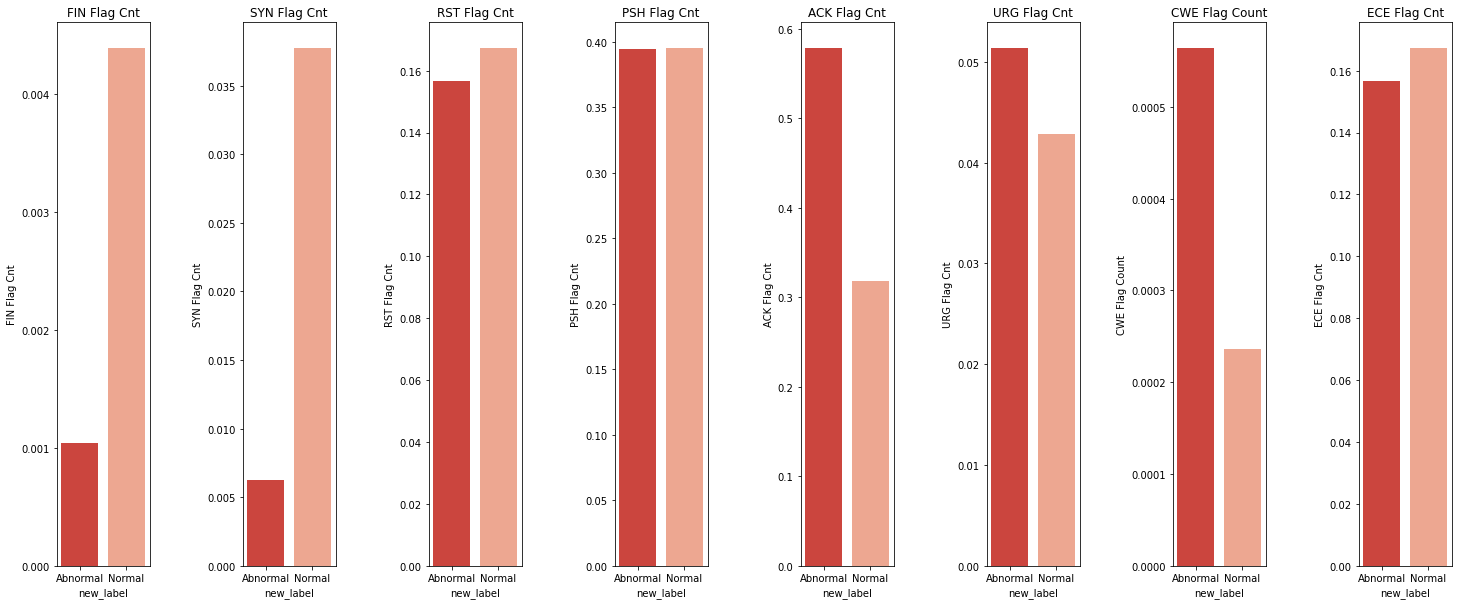

In [ ]:
# Label - flag cnt mean
col = df_flag_mean.columns

fig, axes = plt.subplots(1, 8, figsize=(25, 10))
plt.subplots_adjust(wspace=1) 

for i in range(8):
  target = df_flag_mean[col[i]]
  sns.barplot(x=df_flag_mean.index, y=target, palette='Reds_r', ax=axes[i])
  axes[i].set_title(col[i])

### 2-feature correlation

#### Fwd Act Data Pkts vs. Idle Min
- DDOS attack-LOIC-UDP 공격의 Idle Min은 0으로 나타남

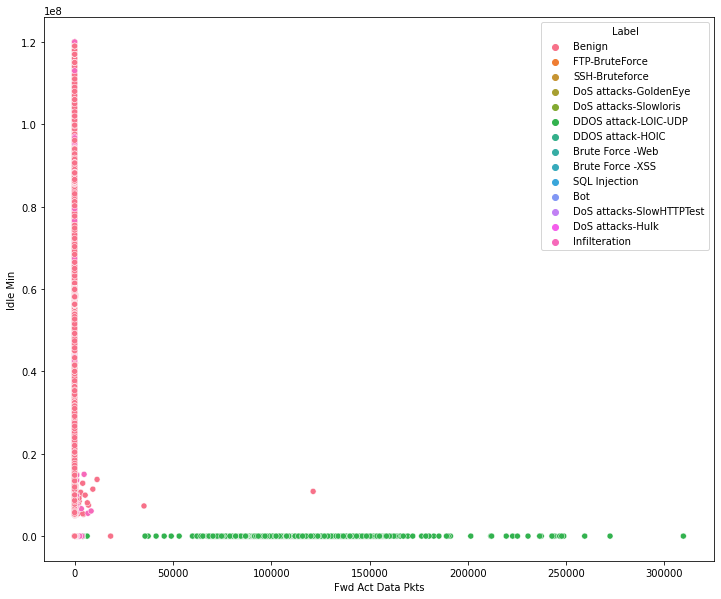

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='Fwd Act Data Pkts',y = 'Idle Min',hue='Label',data=df)
plt.show()

#### Fwd Pkt Len Mean vs. Tot Fwd Pkts
+ DDOS attack-LOIC-UDP 공격은 Fwd Pkt Len Mean는 대체로 0에서 발생
+ Infilteration(기타 분류되지 않은 공격)의 Tot Fwd Pkts 는 대체로 0에서 발생

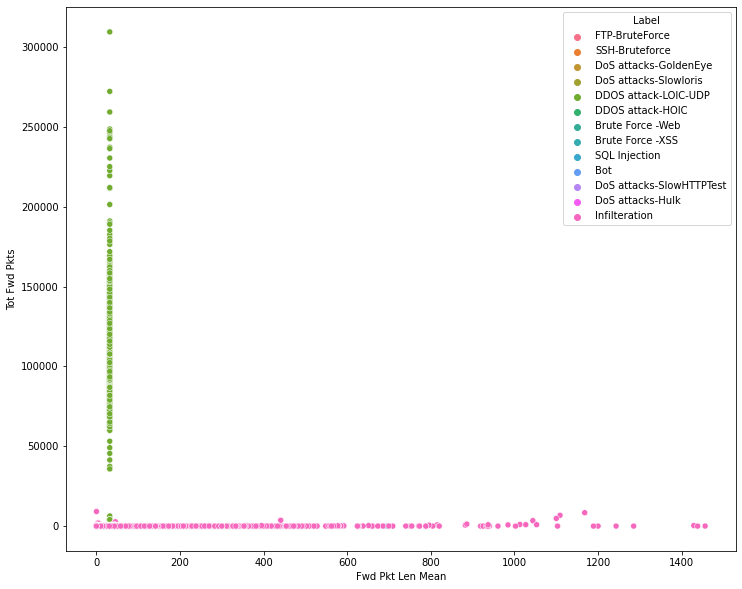

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='Fwd Pkt Len Mean',y = 'Tot Fwd Pkts',hue='Label',data = anormal)
plt.show()

#### Pkt Len Mean vvs. Flow IAT Mean
+ Dos attacks-GoldenEye 공격이 흔히 발생하는 클러스터 구간이 형성됨

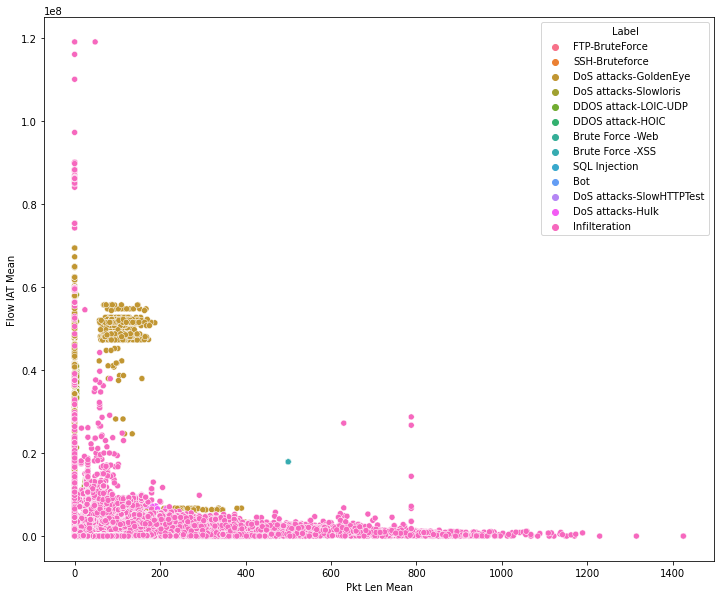

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='Pkt Len Mean',y = 'Flow IAT Mean',hue='Label',data = anormal)
plt.show()

#### Pkt Size Avg vs. Pwd Pkt Len Mean
+ Bot 공격의 Pkt Size Avg가 0 ~ 200 사이와 Fwd Pkt Len Mean값이 0 ~ 600 사이에서 발생

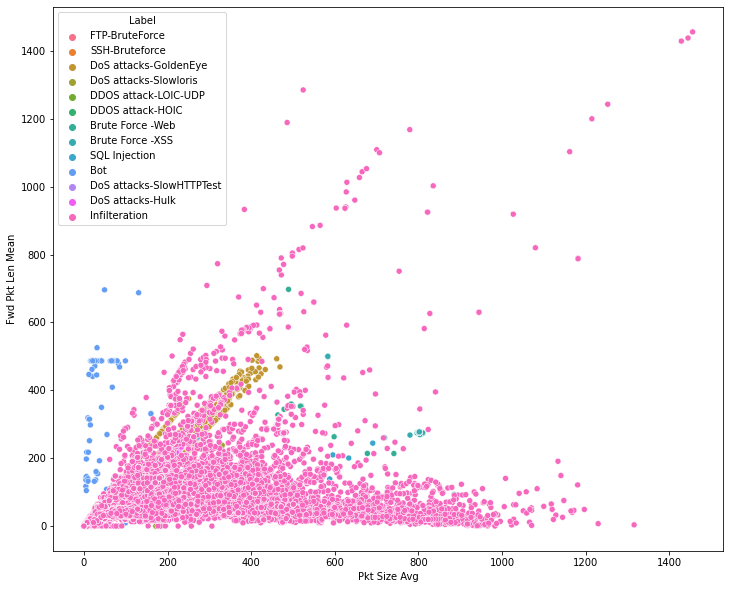

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='Pkt Size Avg',y = 'Fwd Pkt Len Mean',hue='Label',data = anormal)
plt.show()

#### Pkt Size Avg vs Tot Bwd Pkts

##### Pkt Size Avg(전범위)

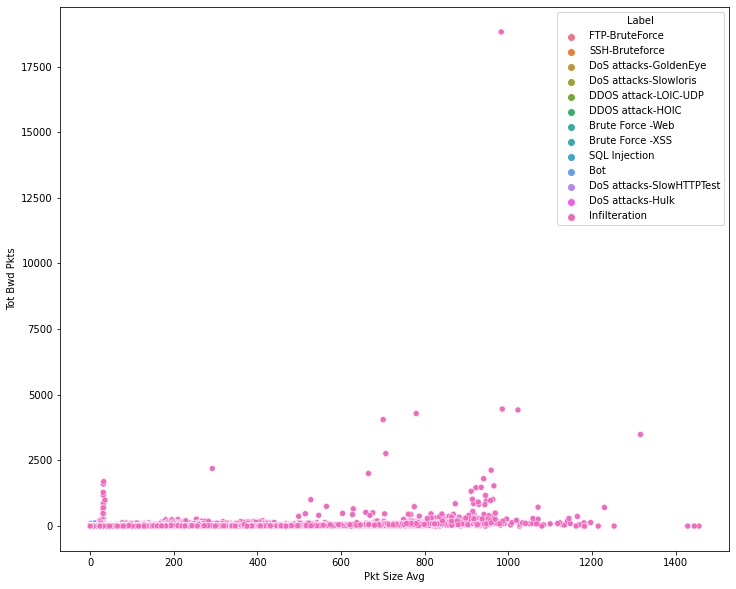

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='Pkt Size Avg',y = 'Tot Bwd Pkts',hue='Label',data = anormal)
plt.show()

##### Pkt Size Avg(1500 이하)

In [ ]:
anormal_Tot_Bwd_Pkts = anormal[anormal['Tot Bwd Pkts'] <1500]

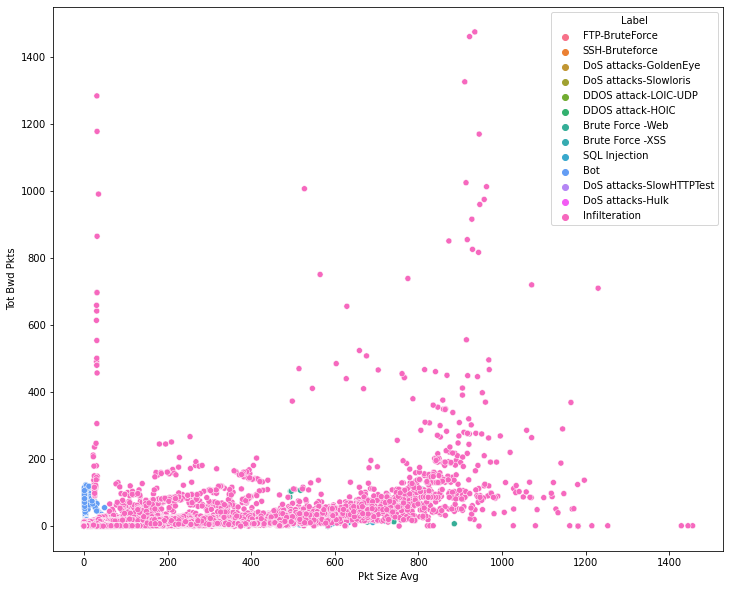

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='Pkt Size Avg',y = 'Tot Bwd Pkts',hue='Label',data = anormal_Tot_Bwd_Pkts)
plt.show()

##### Pkt Size Avg(200 이하)

/opt/miniconda3/envs/xgboost_trial2/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


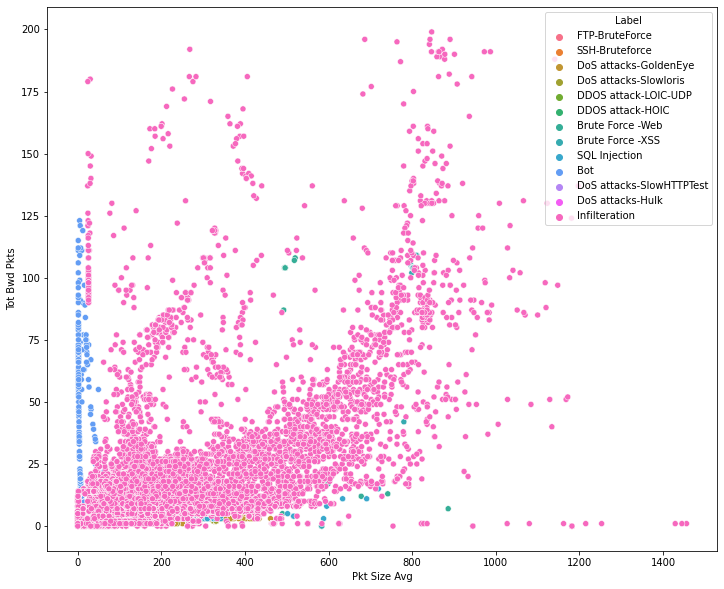

In [ ]:
anormal_Tot_Bwd_Pkts = anormal[anormal['Tot Bwd Pkts'] <200]
plt.figure(figsize=(12,10))
sns.scatterplot(x='Pkt Size Avg',y = 'Tot Bwd Pkts',hue='Label',data = anormal_Tot_Bwd_Pkts)
plt.show()

##### Pkt Size Avg(100 이하)

/opt/miniconda3/envs/xgboost_trial2/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


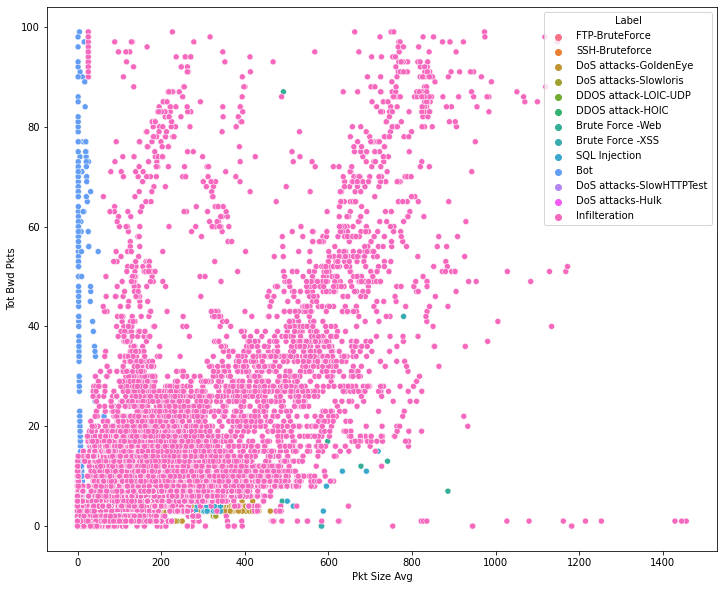

In [ ]:
anormal_Tot_Bwd_Pkts = anormal[anormal['Tot Bwd Pkts'] <100]
plt.figure(figsize=(12,10))
sns.scatterplot(x='Pkt Size Avg',y = 'Tot Bwd Pkts',hue='Label',data = anormal_Tot_Bwd_Pkts)
plt.show()

##### Pkt Size Avg(20 이하)

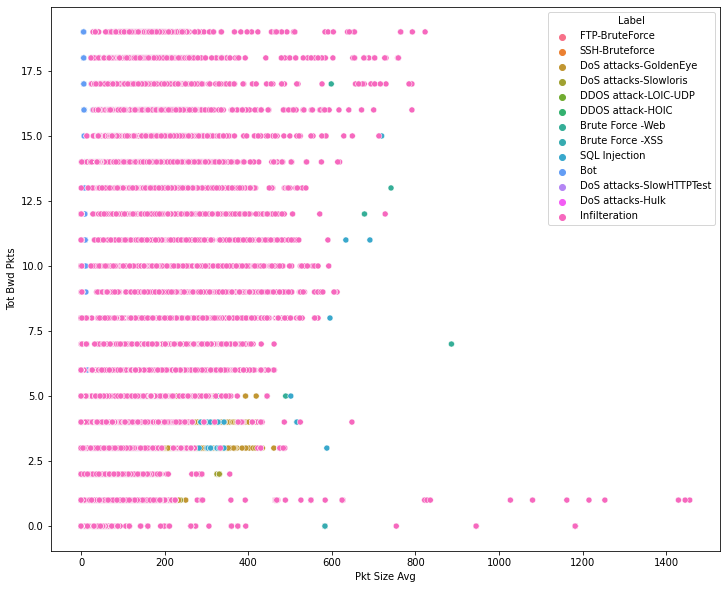

In [ ]:
anormal_Tot_Bwd_Pkts = anormal[anormal['Tot Bwd Pkts'] <20]
plt.figure(figsize=(12,10))
sns.scatterplot(x='Pkt Size Avg',y = 'Tot Bwd Pkts',hue='Label',data = anormal_Tot_Bwd_Pkts)
plt.show()

### Benign Analysis
- Benign heatpmap Visualization
- TCP - Dst Port - "Total Fwd Pkts" boxplot
- Benign TCP important columns boxplot

In [ ]:
normal = df[df['Label']=='Benign']
abnormal = df[df['Label']!='Benign']

In [ ]:
nor = normal[['Protocol','Tot Fwd Pkts','Tot Bwd Pkts','Fwd Seg Size Min','Flow IAT Mean','Flow Pkts/s','Flow Byts/s','Idle Min']]

In [ ]:
nor.tail()

Protocol  Tot Fwd Pkts  ...  Flow Byts/s    Idle Min
8284190         0            31  ...     0.000000         0.0
8284191         6             2  ...     0.000000         0.0
8284192         6             8  ...  1931.145020         0.0
8284193         6            14  ...   448.235718         0.0
8284194         6             2  ...     0.000000  86600000.0

[5 rows x 8 columns]

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

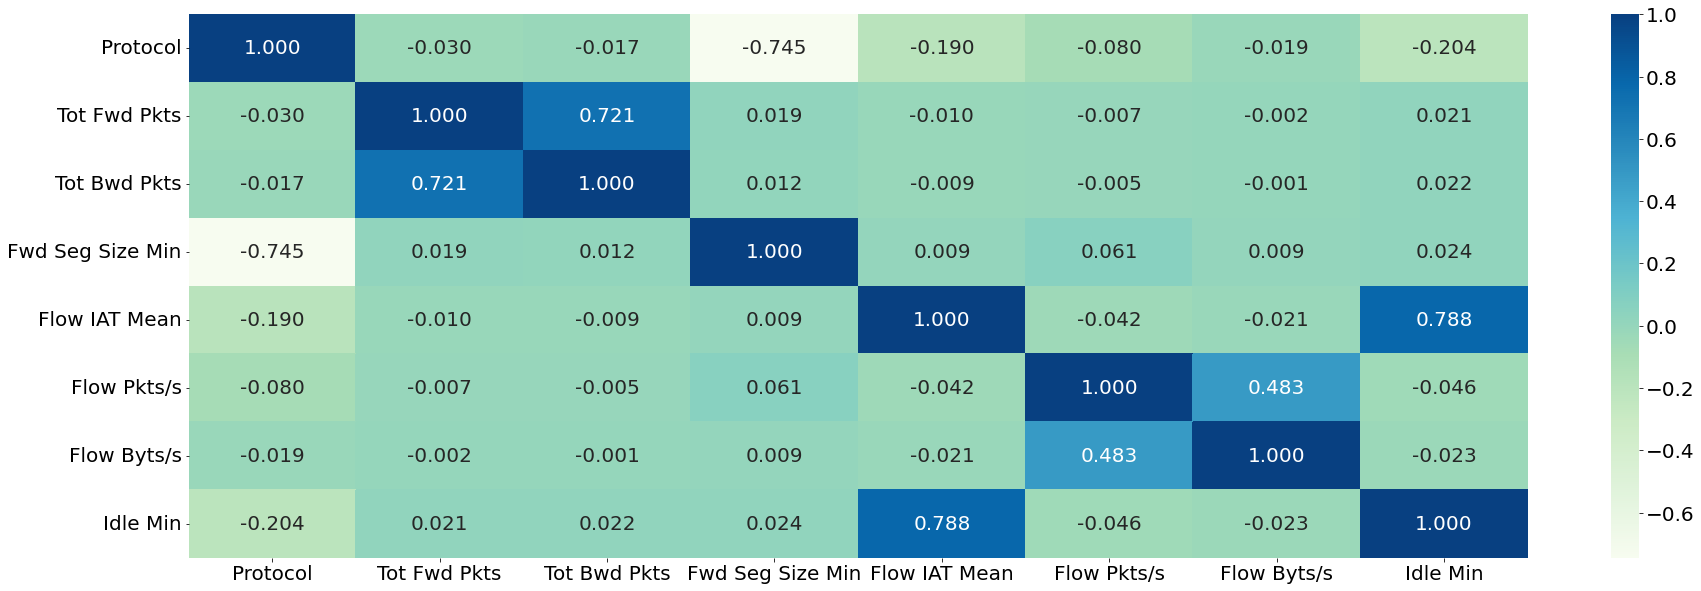

In [ ]:
# 정상데이터 컬럼 heatpmap시각화 
plt.figure(figsize=(30,10))
sns.heatmap(nor.corr(),annot=True,fmt = '.3f', xticklabels=nor.columns, yticklabels=nor.columns, cmap='GnBu')
plt.xticks(rotation=0)

In [ ]:
nor_tcp = nor[nor['Protocol']==6]
nor_upd = nor[nor['Protocol']==17]
nor_hop = nor[nor['Protocol']==0]

In [ ]:
a=nor_tcp['Dst Port'].value_counts()
a.compute()

80       820283
443      776454
3389     728976
445      276034
3128      12083
          ...  
20969         1
20971         1
4405          1
20980         1
65535         1
Name: Dst Port, Length: 64085, dtype: int64

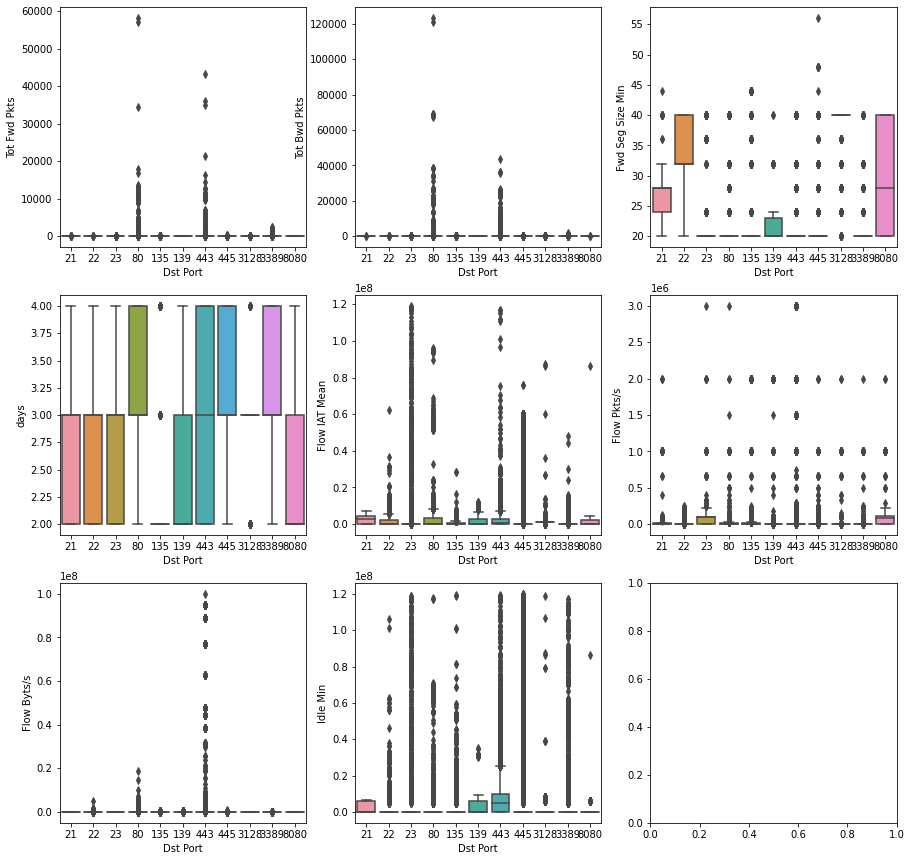

In [ ]:
# 정상 TCP데이터에서 중요한 컬럼의 boxplot 시각화
cols = nor_tcp.columns[2:]
idx = [80,443,3389,21,8080,445,22,135,3128,23,139]
dataframe = nor_tcp[(nor_tcp['Dst Port']==80)|(nor_tcp['Dst Port']==443)|(nor_tcp['Dst Port']==3389)|(nor_tcp['Dst Port']==21)|
                    (nor_tcp['Dst Port']==8080)|(nor_tcp['Dst Port']==445)|(nor_tcp['Dst Port']==22)|(nor_tcp['Dst Port']==135)|
                    (nor_tcp['Dst Port']==3128)|(nor_tcp['Dst Port']==23)|(nor_tcp['Dst Port']==139)]
f,ax = plt.subplots(3,3,figsize=(15,15))
k = 0 
for c in cols : 
    i,j = divmod(k,3)
    sns.boxplot(x='Dst Port',y = c,data = dataframe,ax=ax[i,j])

    k+=1

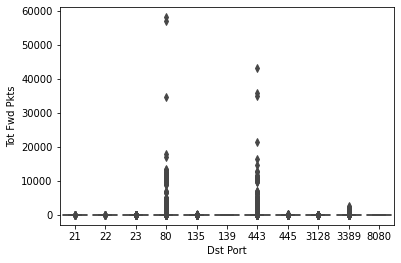

In [ ]:
# TCP의 포트별(Dst Port) "Total Fwd Pkts" 컬럼의 boxplot 시각화
sns.boxplot(x='Dst Port',y = 'Tot Fwd Pkts',data = dataframe.compute())

## Visualization - Dimension reduction

### SelectFromModel
- RandomForest selector <br>
`['Dst Port', 'Flow Duration', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Max', 'Flow IAT Min', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'PSH Flag Cnt', 'ACK Flag Cnt', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min']`

- GBM selector <br>
`['Dst Port', 'URG Flag Cnt', 'Fwd Act Data Pkts', 'Fwd Seg Size Min']`

- Logistic Regression selector <br>
`['Dst Port', 'Flow Duration', 'TotLen Fwd Pkts', 'Flow Byts/s', 'Flow IAT Mean', 'Flow IAT Max', 'Fwd IAT Mean', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Subflow Fwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Idle Mean', 'Idle Std', 'Idle Max']`


In [ ]:
data = df

In [ ]:
X = data.drop(columns=['Label', 'Timestamp'])
y = data['Label']

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

print(y)

[0 0 0 ... 0 0 0]


In [ ]:
RFselector = SelectFromModel(estimator=RandomForestClassifier()).fit(X, y)
GBMselector = SelectFromModel(estimator=GradientBoostingClassifier()).fit(X, y)
LRselector = SelectFromModel(estimator=LogisticRegression()).fit(X, y)

In [ ]:
print('RFselector')
print(RFselector.get_support())
print()
print('GBMselector')
print(GBMselector.get_support())
print()
print('LRselector')
print(LRselector.get_support())
print()

RFselector
[ True False  True False False False False False False False False False
 False False False False  True  True False  True  True False False False
 False False False False False False False False False False False  True
  True  True  True False False False False False False False False  True
  True False False False False False False False False False False False
 False False False False False False  True  True  True  True False False
 False False False False False False]

GBMselector
[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False  True  True False False
 False False False False False False]

LRselector
[ True False

In [ ]:
col = X.columns

print('RFselector')
print(col[RFselector.get_support()])
print()
print('GBMselector')
print(col[GBMselector.get_support()])
print()
print('LRselector')
print(col[LRselector.get_support()])
print()

RFselector
Index(['Dst Port', 'Flow Duration', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Max', 'Flow IAT Min', 'Fwd Header Len', 'Bwd Header Len',
       'Fwd Pkts/s', 'Bwd Pkts/s', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min'],
      dtype='object')

GBMselector
Index(['Dst Port', 'URG Flag Cnt', 'Fwd Act Data Pkts', 'Fwd Seg Size Min'], dtype='object')

LRselector
Index(['Dst Port', 'Flow Duration', 'TotLen Fwd Pkts', 'Flow Byts/s',
       'Flow IAT Mean', 'Flow IAT Max', 'Fwd IAT Mean', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Subflow Fwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Idle Mean', 'Idle Std',
       'Idle Max'],
      dtype='object')



### PCA
- 50,000개 데이터로 PCA 수행

In [ ]:
# 데이터 선택 
pca_y = df.loc[:50000]['Label']
pca_x = df.loc[:50000][['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']]

In [ ]:
# 데이터 스케일링 진행 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(pca_x)
t_pca_x = ss.transform(pca_x)

In [ ]:
# 차원축소 n = 2
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
comp = pca.fit_transform(t_pca_x)

In [ ]:
# 라벨의 종류 선택 
y_list = pca_y.unique()

In [ ]:
pca_df = pd.DataFrame(data=comp, columns = ['pca components1','pca components2'])

In [ ]:
pca_df['target'] = pca_y

In [ ]:
# 2개의 component가 전체의 30%를 설명 
pca.explained_variance_ratio_

array([0.17581619, 0.14706551])

In [ ]:
pca_df

pca components1  pca components2         target
0               0.321616        -9.924165         Benign
1               0.321607        -9.924141         Benign
2               0.321556        -9.923908         Benign
3               2.777398         1.718717         Benign
4               2.577893         1.662744         Benign
...                  ...              ...            ...
2389933        -2.238772         0.273586  Infilteration
2389934        -2.230785         0.275573  Infilteration
2389935        -2.239272         0.273574  Infilteration
2389936        -2.240546         0.273298  Infilteration
2389937        -2.237145         0.274051  Infilteration

[2389938 rows x 3 columns]

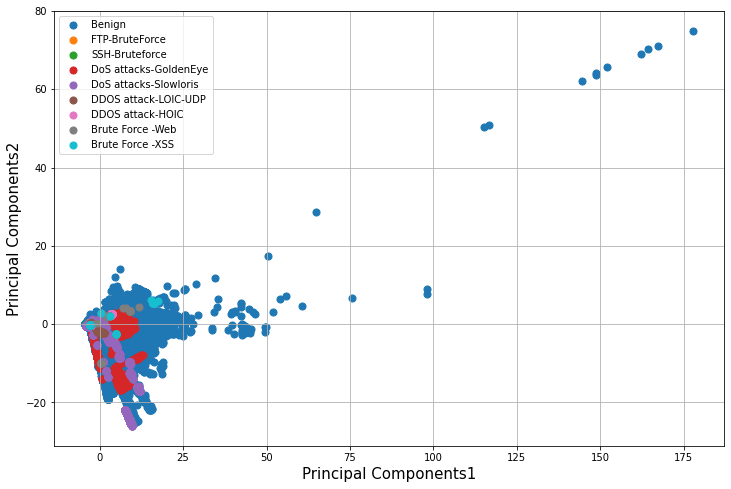

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Components1',fontsize=15)
ax.set_ylabel('Principal Components2',fontsize=15)

colors = ["#1f77b4","#ff7f0e","#2ca02c","#d62728","#9467bd","#8c564b","#e377c2","#7f7f7f","#17becf"]
for target,color in zip(y_list,colors):
  idx = pca_df['target']==target
  ax.scatter(pca_df.loc[idx,'pca components1'],pca_df.loc[idx,'pca components2'],c=color,s=50)
ax.legend(y_list)
ax.grid()

### t-SNE
- 10,000개 데이터로 t-SNE 수행

In [ ]:
import time
from sklearn.manifold import TSNE

#loading dataset
import random
sample = random.sample(range(len(df)), 10000)

data = df.iloc[sample]
feature_names = ['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']
Y = data['Label']
X = data[feature_names]
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X.values)
TSNE_df = pd.DataFrame(data = tsne_results, columns=['component_1', 'component_2'])
TSNE_df['Label'] = list(Y)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 5.502s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.056335
[t-SNE] KL divergence after 300 iterations: 1.763991


In [ ]:
!pip install ggplot

     |████████████████████████████████| 2.2 MB 11.0 MB/s 


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


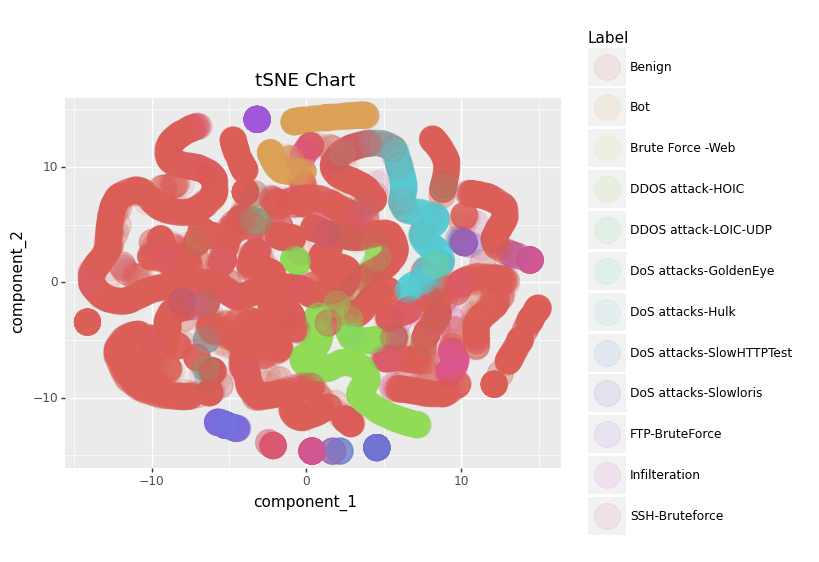

<ggplot: (8772908176509)>

In [ ]:
# normal, abnormal
from plotnine import *
chart = ggplot(TSNE_df, aes(x='component_1', y='component_2', color='Label')) \
            + geom_point(size=10, alpha=0.1) \
            + ggtitle("tSNE Chart")
chart

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


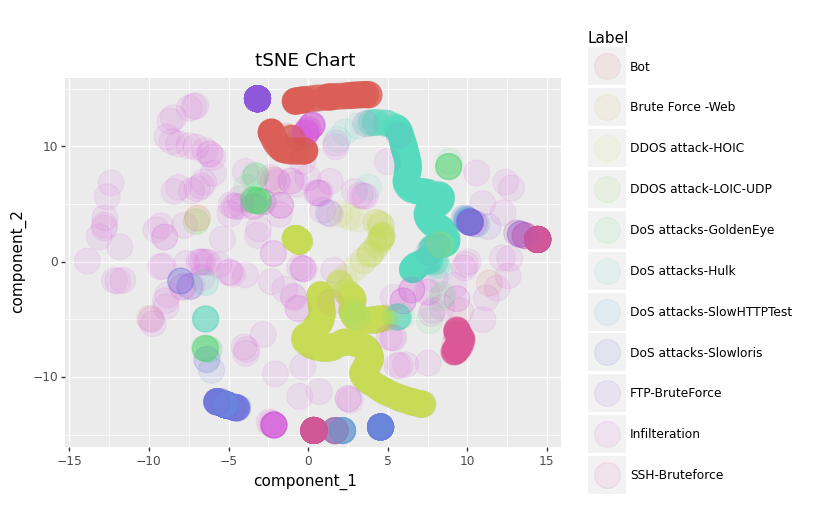

<ggplot: (8772879905721)>

In [ ]:
# abnormal
from plotnine import *
TSNE_df_not_benign = TSNE_df[TSNE_df["Label"]!='Benign']
chart = ggplot(TSNE_df_not_benign, aes(x='component_1', y='component_2', color='Label')) \
            + geom_point(size=10, alpha=0.1) \
            + ggtitle("tSNE Chart")
chart

In [ ]:
import time
from sklearn.manifold import TSNE

#loading dataset
import random
sample = random.sample(range(len(df)), 10000)

data = df.iloc[sample]
feature_names = ['Dst Port', 'Flow Duration', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Max', 
                 'Flow IAT Min', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 
                 'PSH Flag Cnt', 'ACK Flag Cnt', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min']
Y = data['Label']
X = data[feature_names]
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X.values)
TSNE_df = pd.DataFrame(data = tsne_results, columns=['component_1', 'component_2'])
TSNE_df['Label'] = list(Y)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 3.967s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.791695
[t-SNE] KL divergence after 300 iterations: 1.748141


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


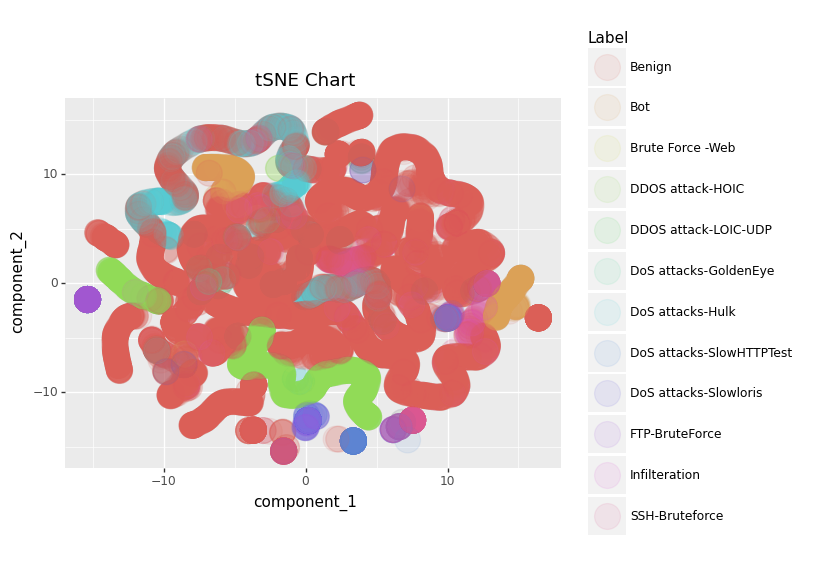

<ggplot: (8772905308285)>

In [ ]:
# normal, abnormal
from plotnine import *
chart = ggplot(TSNE_df, aes(x='component_1', y='component_2', color='Label')) \
            + geom_point(size=10, alpha=0.1) \
            + ggtitle("tSNE Chart")
chart

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


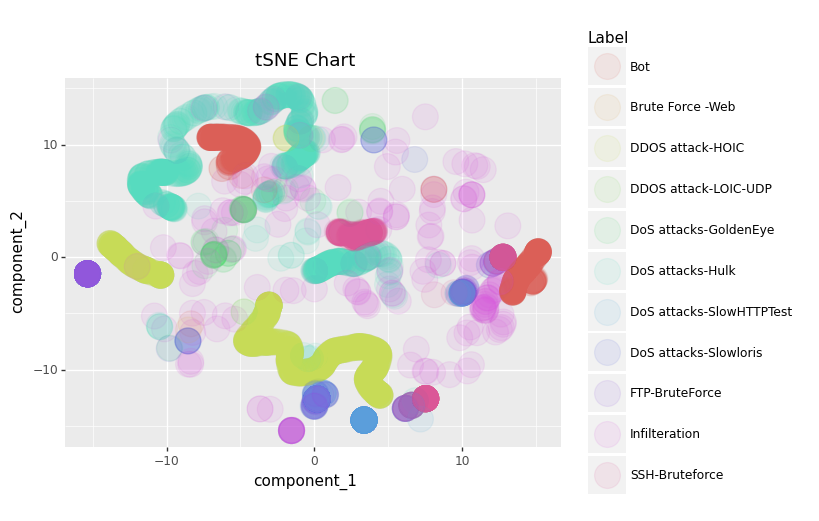

<ggplot: (8772879817417)>

In [ ]:
# abnormal
from plotnine import *
TSNE_df_not_benign = TSNE_df[TSNE_df["Label"]!='Benign']
chart = ggplot(TSNE_df_not_benign, aes(x='component_1', y='component_2', color='Label')) \
            + geom_point(size=10, alpha=0.1) \
            + ggtitle("tSNE Chart")
chart

### K-means
- 10,000개 데이터로 k-means 수행

In [ ]:
# 데이터 선택 
import random
sample = random.sample(range(len(df)), 10000)

k_y = df.iloc[sample]['Label']
k_x = df.iloc[sample][['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']]

In [ ]:
# k 개수 
k_y_list = k_y.unique()
k_y_list

array(['Benign', 'DoS attacks-SlowHTTPTest', 'DDOS attack-HOIC', 'Bot',
       'DoS attacks-Hulk', 'SSH-Bruteforce', 'Infilteration',
       'FTP-BruteForce', 'DoS attacks-GoldenEye', 'DoS attacks-Slowloris',
       'DDOS attack-LOIC-UDP', 'Brute Force -Web'], dtype=object)

In [ ]:
# kmeans 적용을 위한 스케일링 적용 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(k_x)
t_k_x = ss.transform(k_x)

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=len(k_y_list),algorithm='auto')
model.fit(t_k_x)
pred = model.predict(t_k_x)

In [ ]:
result = pd.DataFrame(t_k_x)
result['cluster'] = pred
result.head()

0         1         2  ...        76        77  cluster
0 -0.366921 -0.476825 -0.233921  ... -0.271556 -0.261408        6
1 -0.530156 -0.476825 -0.373581  ... -0.271556 -0.261408        0
2 -0.366921 -0.476825 -0.258390  ... -0.271556 -0.261408        6
3  1.985910 -0.476825 -0.373600  ... -0.271556 -0.261408       10
4 -0.533067 -0.476825 -0.373600  ... -0.271556 -0.261408       10

[5 rows x 79 columns]

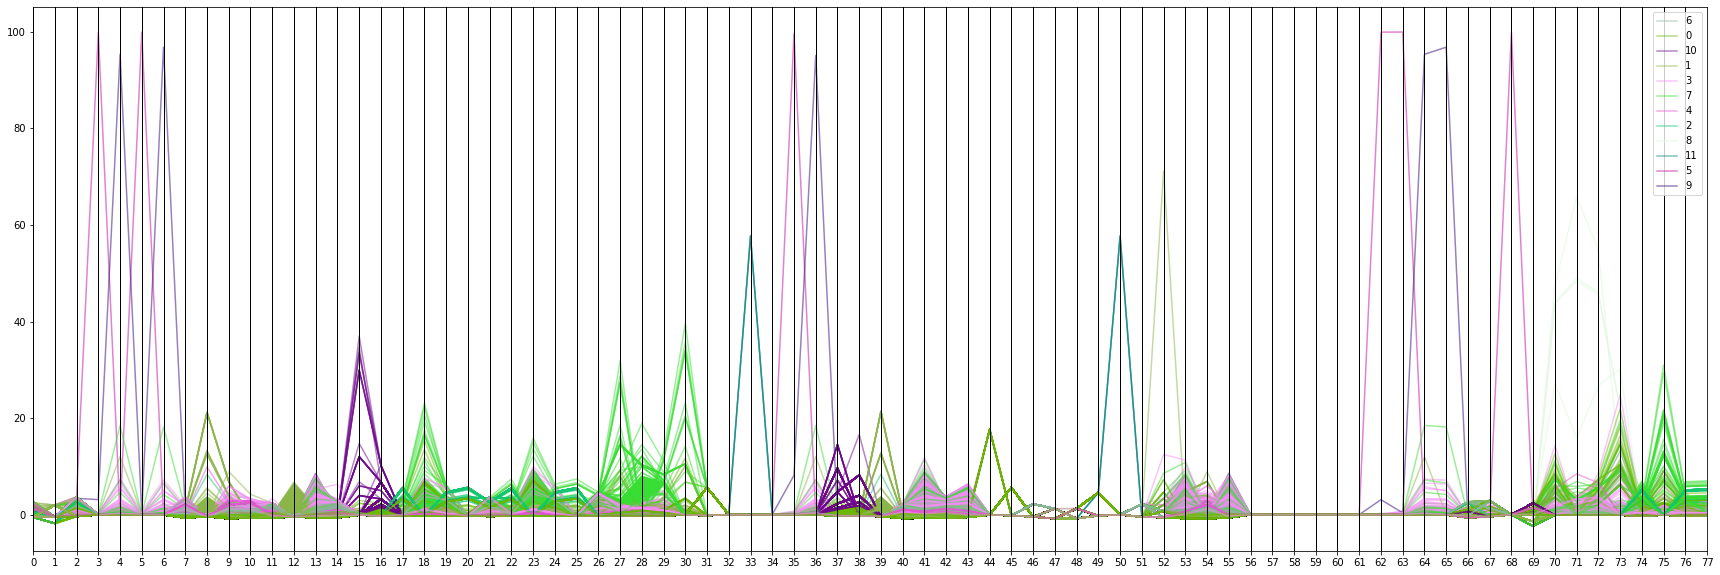

In [ ]:
# k로 묶인 클러스터를 시각화 
# 다차원 공간을 평면으로 시각화함
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30, 10))
parallel_coordinates(result, 'cluster', alpha=0.5, ax=ax)
plt.show()

## etc.

### Timestamp - Attack

#### 시간별 Brute Force-Web

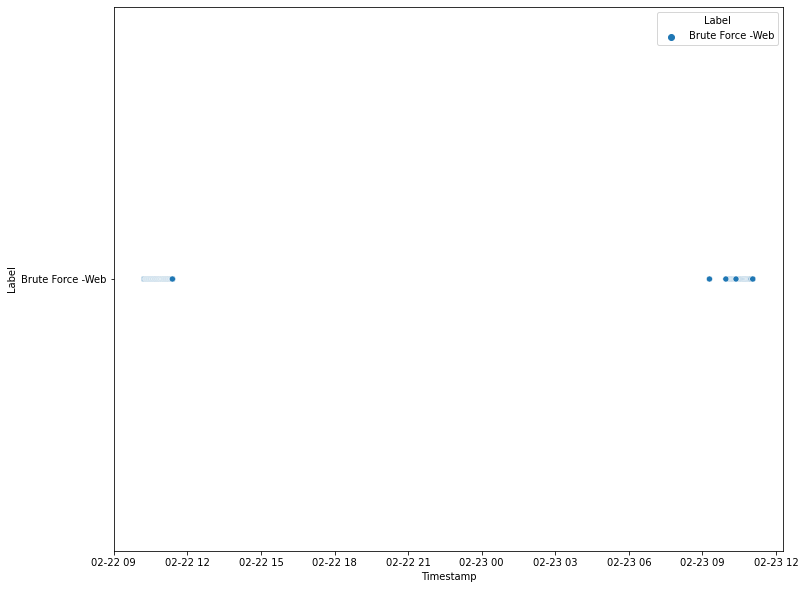

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='Timestamp',y = 'Label',hue='Label',data = fin_df_check)
plt.show()

#### 시간별 DDOS attack-HOIC 

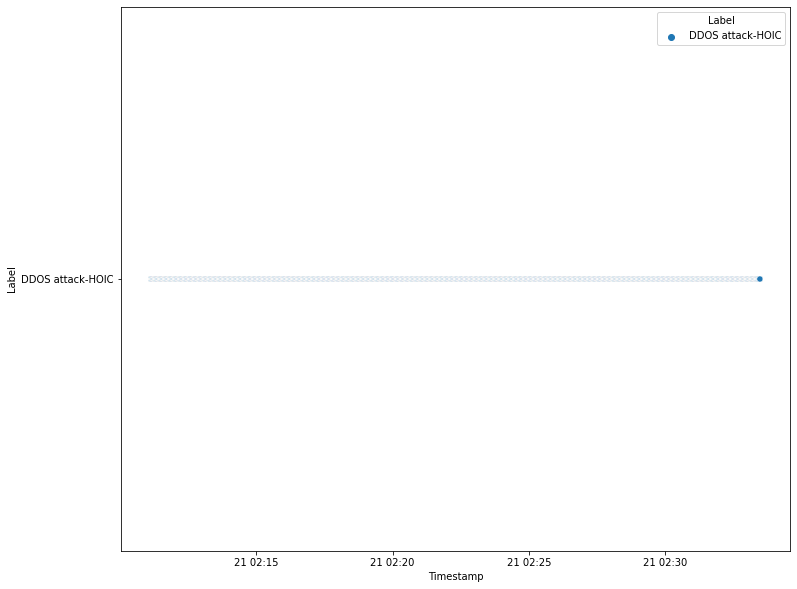

In [ ]:
fin_df_check = fin_df[fin_df['Label'] == "DDOS attack-HOIC"]

plt.figure(figsize=(12,10))
sns.scatterplot(x='Timestamp',y = 'Label',hue='Label',data = fin_df_check)
plt.show()

#### 시간별 Dos attacks-Hulk

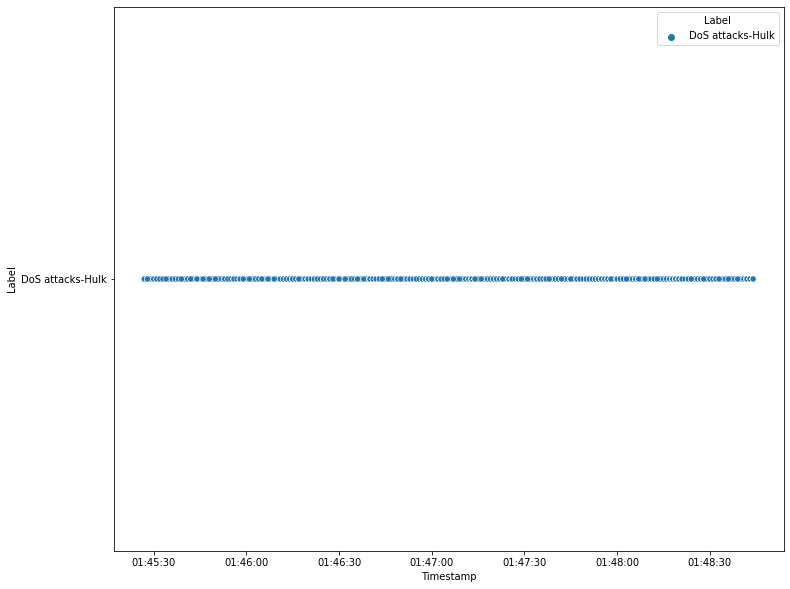

In [ ]:
fin_df_check = fin_df[fin_df['Label'] == "DoS attacks-Hulk"]
plt.figure(figsize=(12,10))
sns.scatterplot(x='Timestamp',y = 'Label',hue='Label',data = fin_df_check)
plt.show()

#### 시간별 Bot 

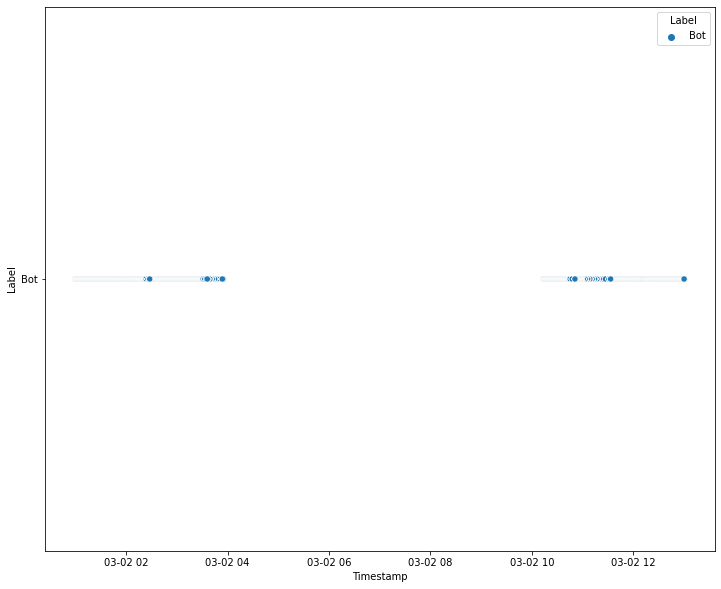

In [ ]:
fin_df_check = fin_df[fin_df['Label'] == "Bot"]

plt.figure(figsize=(12,10))
sns.scatterplot(x='Timestamp',y = 'Label',hue='Label',data = fin_df_check)
plt.show()

#### 시간별 FTP-BruteForce

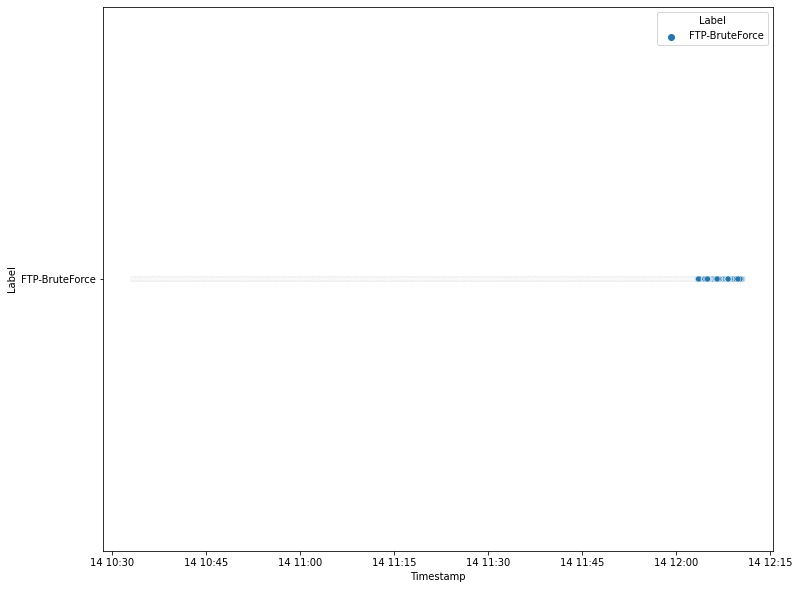

In [ ]:
fin_df_check = fin_df[fin_df['Label'] == "FTP-BruteForce"]
plt.figure(figsize=(12,10))
sns.scatterplot(x='Timestamp',y = 'Label',hue='Label',data = fin_df_check)
plt.show()

#### 시간별 SSH-BruteForce

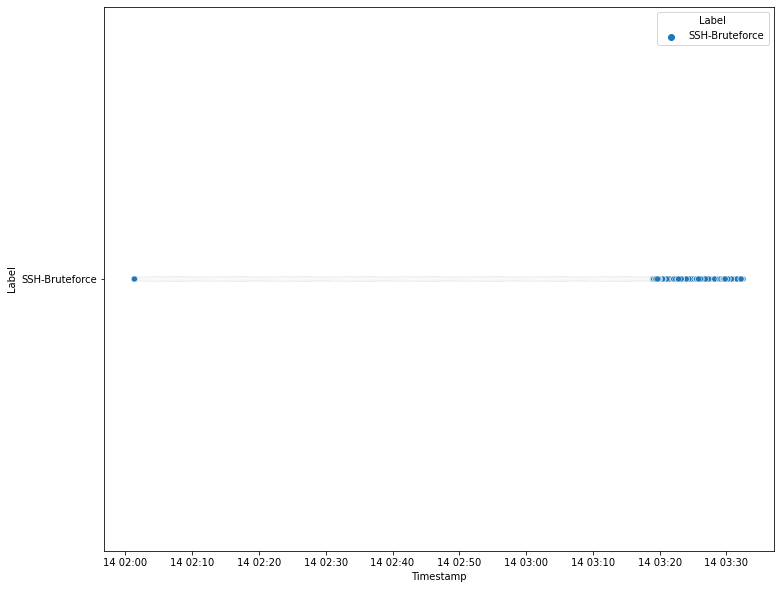

In [ ]:
fin_df_check = fin_df[fin_df['Label'] == "SSH-Bruteforce"]
plt.figure(figsize=(12,10))
sns.scatterplot(x='Timestamp',y = 'Label',hue='Label',data = fin_df_check)
plt.show()

#### 시간별 Infilteration

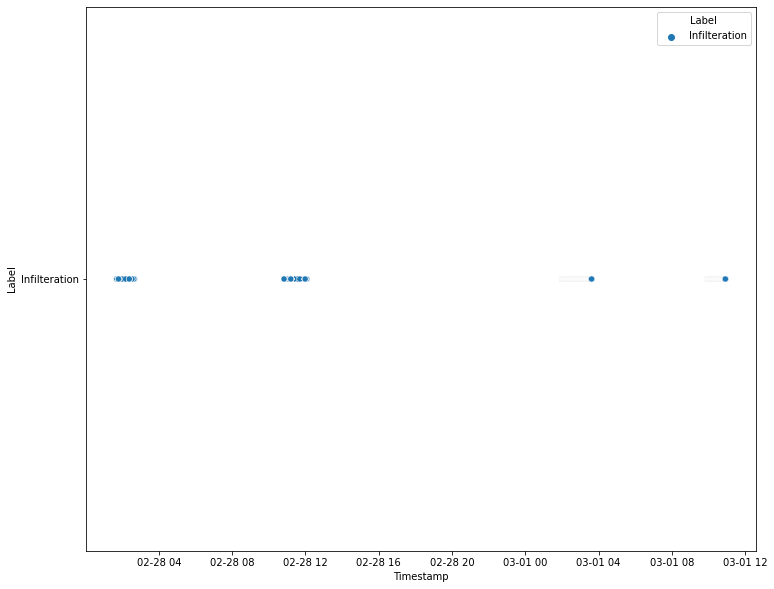

In [ ]:
fin_df_check = fin_df[fin_df['Label'] == "Infilteration"]
plt.figure(figsize=(12,10))
sns.scatterplot(x='Timestamp',y = 'Label',hue='Label',data = fin_df_check)
plt.show()

#### 시간별 Dos attacks-SlowHTTPest

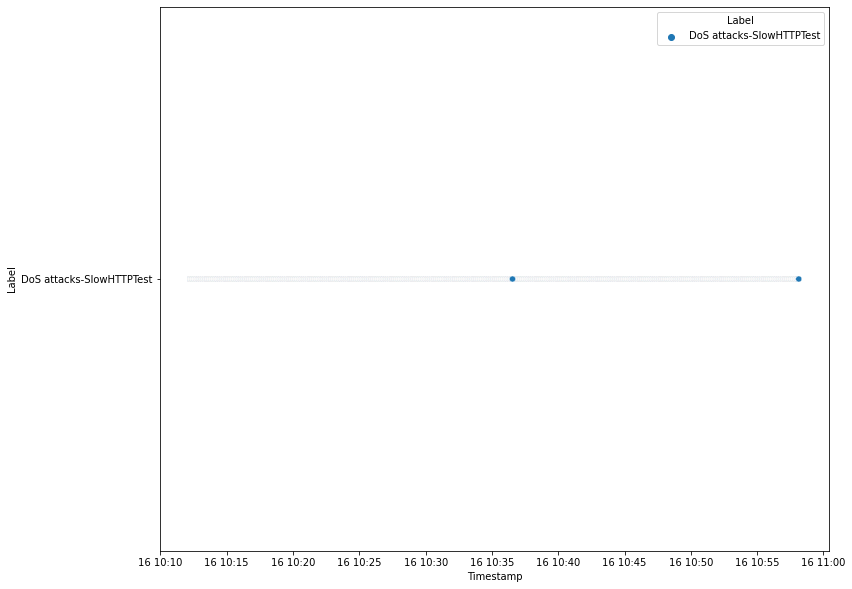

In [ ]:
fin_df_check = fin_df[fin_df['Label'] == "DoS attacks-SlowHTTPTest"]
plt.figure(figsize=(12,10))
sns.scatterplot(x='Timestamp',y = 'Label',hue='Label',data = fin_df_check)
plt.show()

#### 시간별 Dos attacks-GoldenEye

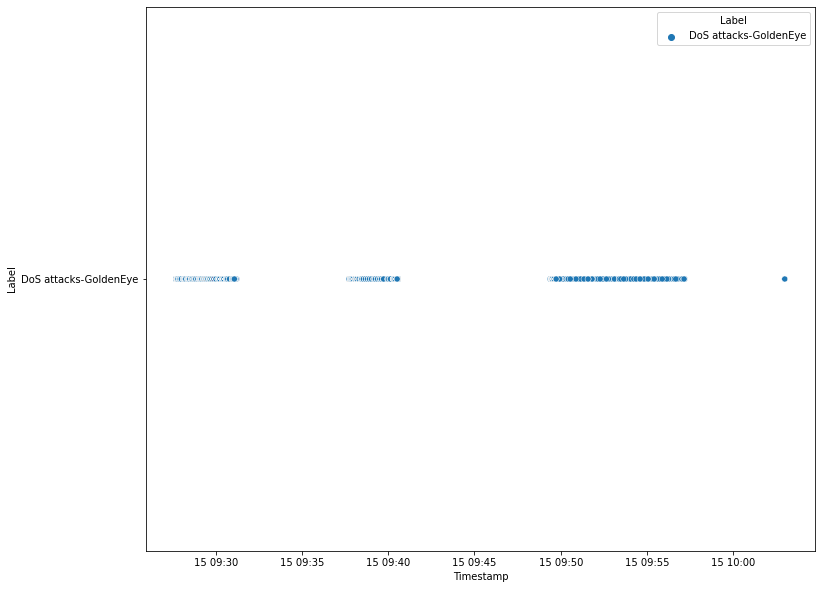

In [ ]:
fin_df_check = fin_df[fin_df['Label'] == "DoS attacks-GoldenEye"]
plt.figure(figsize=(12,10))
sns.scatterplot(x='Timestamp',y = 'Label',hue='Label',data = fin_df_check)
plt.show()

#### 시간별 Dos attacks-Slowloris

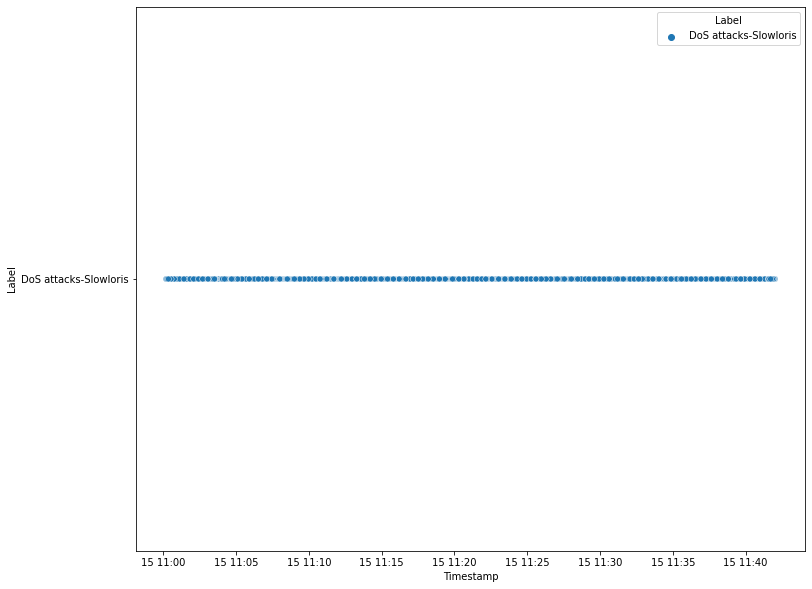

In [ ]:
fin_df_check = fin_df[fin_df['Label'] == "DoS attacks-Slowloris"]
plt.figure(figsize=(12,10))
sns.scatterplot(x='Timestamp',y = 'Label',hue='Label',data = fin_df_check)
plt.show()

#### 시간별 DDOS attack-LOIC-UDP

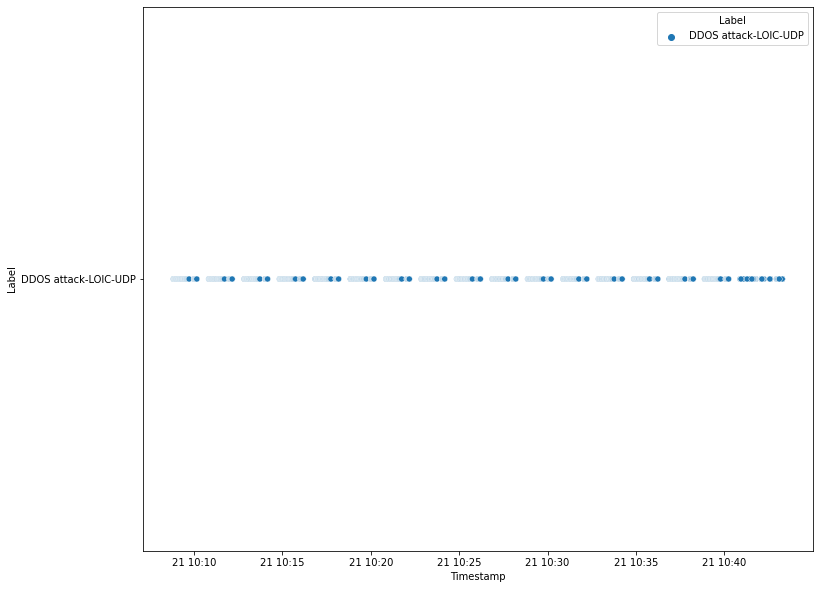

In [ ]:
fin_df_check = fin_df[fin_df['Label'] == "DDOS attack-LOIC-UDP"]
plt.figure(figsize=(12,10))
sns.scatterplot(x='Timestamp',y = 'Label',hue='Label',data = fin_df_check)
plt.show()

#### 시간별 Brute Force -Web

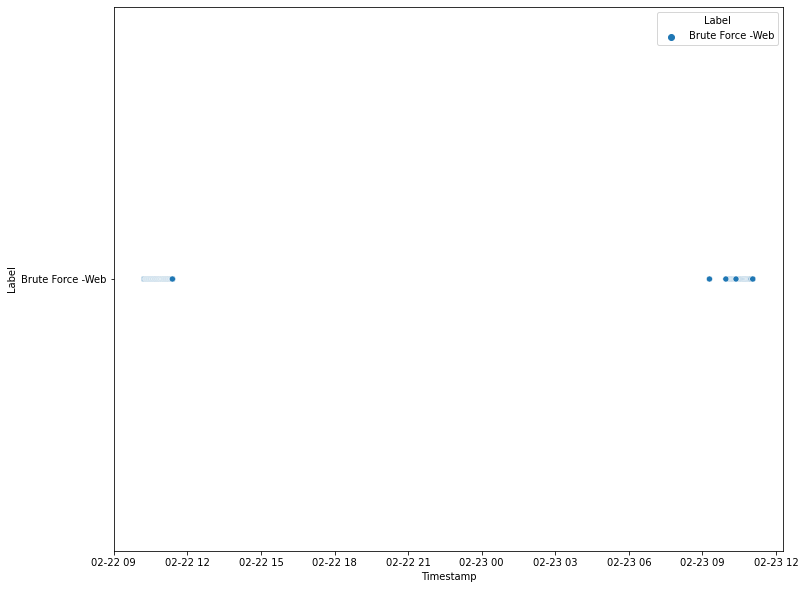

In [ ]:
fin_df_check = fin_df[fin_df['Label'] == "Brute Force -Web"]
plt.figure(figsize=(12,10))
sns.scatterplot(x='Timestamp',y = 'Label',hue='Label',data = fin_df_check)
plt.show()

#### 7-13 시간별 Brute Force -XSS

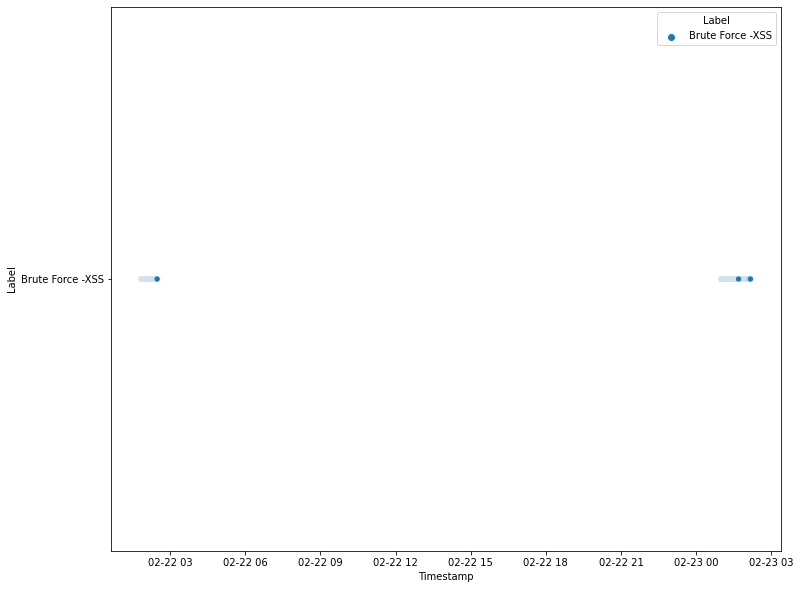

In [ ]:
fin_df_check = fin_df[fin_df['Label'] == "Brute Force -XSS"]
plt.figure(figsize=(12,10))
sns.scatterplot(x='Timestamp',y = 'Label',hue='Label',data = fin_df_check)
plt.show()

#### 시간별 SQL Injection

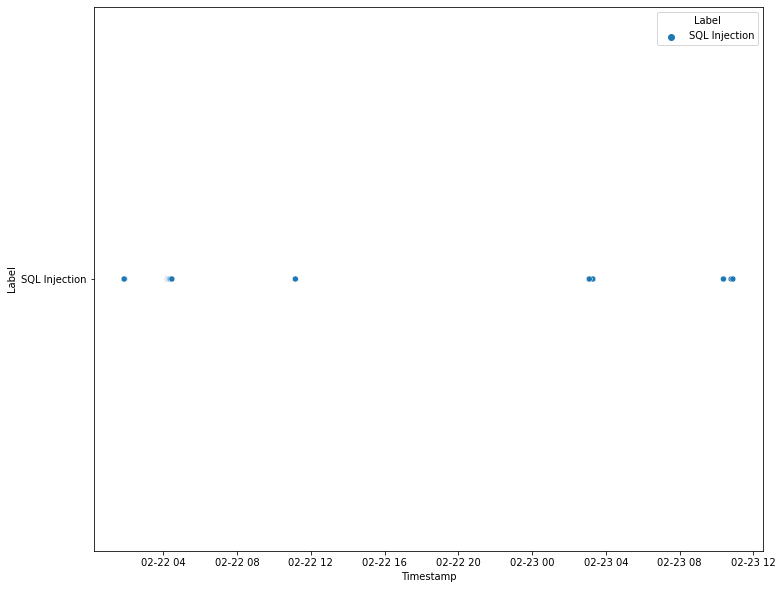

In [ ]:
fin_df_check = fin_df[fin_df['Label'] == "SQL Injection"]
plt.figure(figsize=(12,10))
sns.scatterplot(x='Timestamp',y = 'Label',hue='Label',data = fin_df_check)
plt.show()

### UDP - Timestamp vs. Fwd Seg Size Avg

#### (전체 UDP) Timestamp vs. Fwd Seg Size Avg 

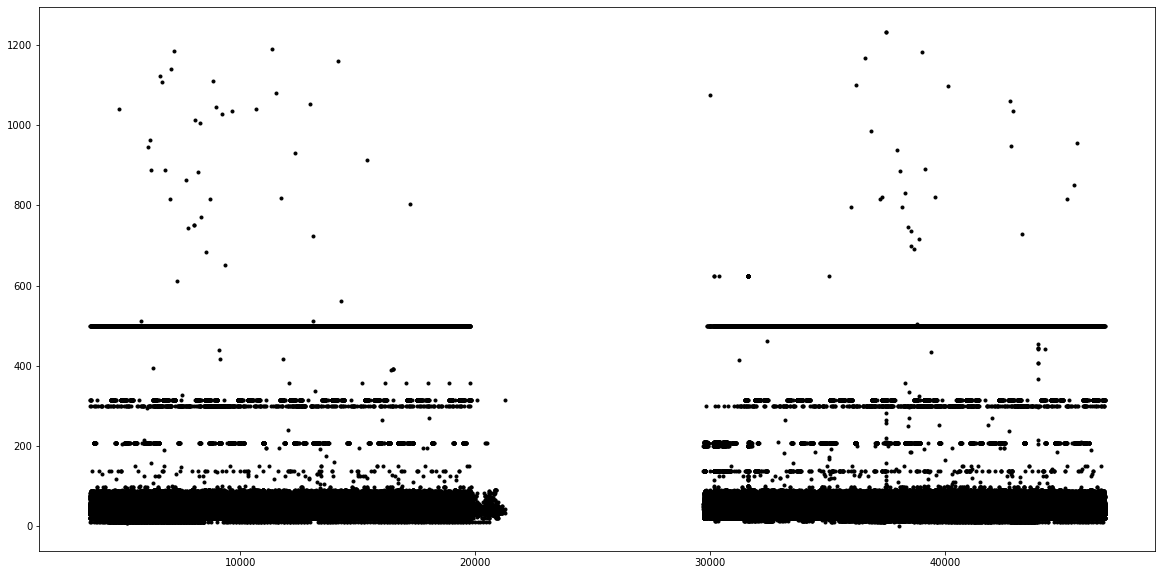

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(test['Timestamp'], test['Fwd Seg Size Avg'], 'k.')
plt.show();

In [ ]:
test_normal = test[test['Label'] == "Benign"]
test_anormal = test[test['Label'] != "Benign"]

#### (Normal UDP) Timestamp vs. Fwd Seg Size Avg

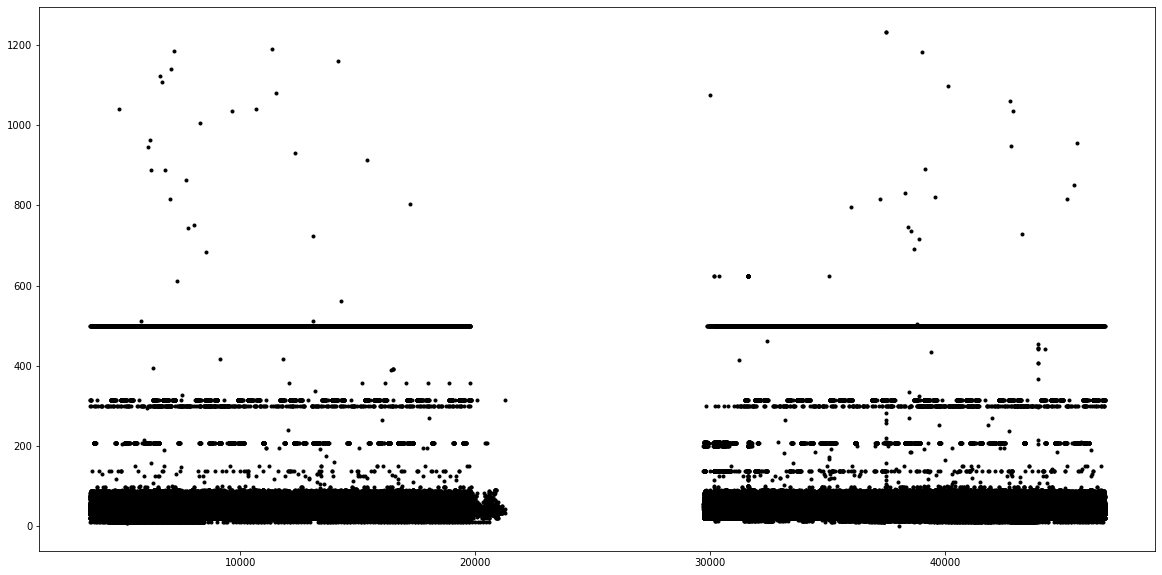

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(test_normal['Timestamp'], test_normal['Fwd Seg Size Avg'], 'k.')
plt.show();

#### (Anormal UDP) Timestamp vs. Fwd Seg Size Avg

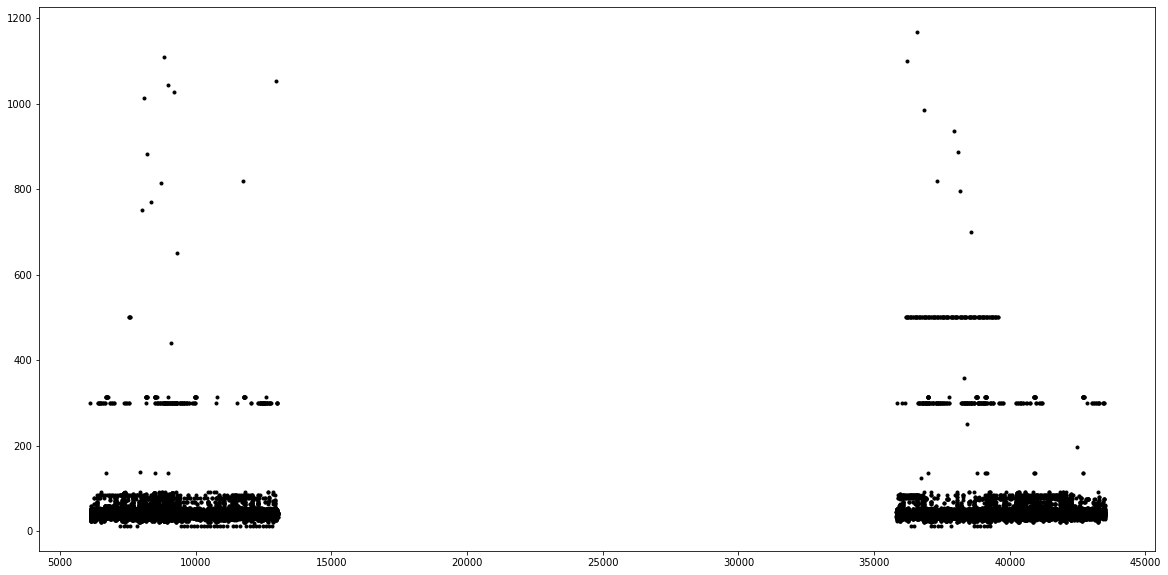

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(test_anormal['Timestamp'], test_anormal['Fwd Seg Size Avg'], 'k.')
plt.show();